In [136]:
import pandas as pd
import numpy as np
import rdkit as rdk
import pubchempy as pcp
from rdkit import Chem
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc


In [137]:
matplotlib.rcParams['figure.dpi'] = 600

# Data Manipulation

#### GNPS

In [138]:
gnps = pd.read_csv('GNPS/all_adducts.csv')
gnps['db'] = ['gnps' for ind in gnps.index]
print(gnps.shape)
gnps.drop_duplicates()
# get rid of the only-mass ones
gnps = gnps[gnps.adduct.str.contains("M")].copy() 
print(gnps.shape)
gnps.head()

(9312, 6)
(9287, 6)


,adduct,parent_mass,name,inchikey,smile,db
0,M+H,981.400,3-Des-Microcystein_LR,NaN,NaN,gnps
1,M+H,940.250,Hoiamide B,NaN,NaN,gnps
2,M+H,456.100,Malyngamide C,NaN,NaN,gnps
3,M+H,545.000,Scytonemin,NaN,NaN,gnps
4,M+H,314.116,Salinisporamide A,NaN,NaN,gnps


#### MassBank of North America

In [139]:
mona = pd.read_csv('MassBank_LCMS/all_adducts.csv')
mona['db'] = ['mona' for ind in mona.index]
print(mona.shape)
mona.drop_duplicates()
# get rid of the only-mass ones
#mona = mona[mona.adduct.str.contains("M")].copy() 
#print(mona.shape)
mona = mona.loc[mona.adduct.str.contains("M", na=False)].copy().reset_index()
print(mona.shape)
mona.head()

(129110, 7)
(120034, 8)


,index,adduct,parent_mass,name,formula,inchikey,smile,db
0,0,[M+H]+,284.013474,Sulfaclozine,C10H9ClN4O2S,InChI=1S/C10H9ClN4O2S/c11-9-5-13-6-10(14-9)15-...,c1cc(ccc1N)S(=O)(=O)Nc2cncc(n2)Cl,mona
1,1,[M+H]+,284.013474,Sulfachlorpyridazine,C10H9ClN4O2S,InChI=1S/C10H9ClN4O2S/c11-9-5-6-10(14-13-9)15-...,c1cc(ccc1N)S(=O)(=O)Nc2ccc(nn2)Cl,mona
2,2,[M+H]+,278.083747,Sulfadimidine,C12H14N4O2S,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,Cc1cc(nc(n1)NS(=O)(=O)c2ccc(cc2)N)C,mona
3,3,[M+H]+,278.083747,Sulfamethazine,C12H14N4O2S,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,CC1=CC(C)=NC(NS(=O)(=O)C2=CC=C(N)C=C2)=N1,mona
4,4,[M+H]+,278.083747,Sulfamethazine,C12H14N4O2S,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,CC1=CC(C)=NC(NS(=O)(=O)C2=CC=C(N)C=C2)=N1,mona


#### NIST

In [140]:
nist = pd.read_csv('NIST/all_adducts.tsv', sep='\t', low_memory=False)
nist['db'] = ['nist' for ind in nist.index]
print(nist.shape)
nist.drop_duplicates()
# get rid of the only-mass ones
nist = nist[nist.adduct.str.contains("M")].copy() 
print(nist.shape)
nist.head()

(699121, 7)
(597201, 7)


,adduct,parent_mass,name,synonyms,formula,inchikey,db
0,[M+H]+,375.248169,Thr-Lys-Lys,TKK;threonyllysyllysine,C16H33N5O5,MGJLBZFUXUGMML-UHFFFAOYSA-N,nist
1,[M+H]+,375.248169,Lys-Thr-Lys,KTK;lysylthreonyllysine,C16H33N5O5,YKBSXQFZWFXFIB-UHFFFAOYSA-N,nist
2,[M+H]+,376.159414,Asp-Asp-Lys,DDK;aspartylaspartyllysine,C14H24N4O8,CELPEWWLSXMVPH-UHFFFAOYSA-N,nist
3,[M+H]+,376.170647,Asp-Ser-Arg,DSR;aspartylserylarginine,C13H24N6O7,ZBYLEBZCVKLPCY-UHFFFAOYSA-N,nist
4,[M+H]+,376.170647,Ser-Asp-Arg,SDR;serylaspartylarginine,C13H24N6O7,CNIIKZQXBBQHCX-UHFFFAOYSA-N,nist


### Combine the above 3 databases

In [141]:
#make them all have the same columns
gnps['formula'] = [np.nan for ind in gnps.index]
gnps['synonyms'] = [np.nan for ind in gnps.index]
mona['synonyms'] = [np.nan for ind in mona.index]
nist['smile'] = [np.nan for ind in nist.index]

gnps = gnps[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]

mona = mona[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]

nist = nist[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]
df = pd.concat([gnps, mona, nist])
print(df.shape)
df.head()

(726522, 8)


,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db
0,M+H,981.400,3-Des-Microcystein_LR,NaN,NaN,NaN,NaN,gnps
1,M+H,940.250,Hoiamide B,NaN,NaN,NaN,NaN,gnps
2,M+H,456.100,Malyngamide C,NaN,NaN,NaN,NaN,gnps
3,M+H,545.000,Scytonemin,NaN,NaN,NaN,NaN,gnps
4,M+H,314.116,Salinisporamide A,NaN,NaN,NaN,NaN,gnps


In [142]:
# remove adducts that are in nonstandard form (ex [M+H+2i]+,[M+H-H2O+2i]+ )
df = df[~df.adduct.str.contains('[\+\-0-9]i')]
# remove adducts with just masses as the adduct
df = df[~df.adduct.str.contains('\d{3}')]

In [143]:
df.columns

Index(['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile',
       'formula', 'db'],
      dtype='object')

In [144]:
# if it doesn't have a mass, we don't want it
df = df[df.parent_mass.notna()].copy()

In [145]:
df.count()

adduct         710094
parent_mass    710094
name           710094
synonyms       503376
inchikey       575436
smile           74864
formula        700807
db             710094
dtype: int64

### Get the charge information

In [146]:
# Code to get charges
# charge dict is dealing with the common adducts appearing in GNPS that don't have the standard adduct format
# put things with >1 appearance by hand into this dict
charge_dict = {'[M-H]':-1,'[M+H]':1, '[M+2H]':2,'[M+Na]':1, '[M+K]':1, 
               'M+H':1, 'M+Na':1, 'M-H':-1, 'M+K':1, 'M+2H':2, 'M+NH4':1, 'M+H-H2O':1,
              'M+H+Na':2, 'M+H+K':2, 'M+Na+H2O':1, 'M+Na+K-H':1, 'M+2K-H':1, 'M+K+H2O':1, 'M+3H':3,
              'M+2Na':2, 'M+Cl':-1, 'M+ACN+H':1, 'M-NH3+H':1,'M+Na+2K-2H':1,'M+2K':2,'M+Na+K':2, 'M+2Na+K-2H':1}

def get_charge(adduct):
    try:
        charge = adduct.split(']')[1]
    except:
        return aget_charge(adduct)
    if charge == '+':
        return 1
    elif charge == '-':
        return -1
    else:
        try:
            x = int(charge[0])
        except:
            return aget_charge(adduct)
        if charge[1] == '+':
            return x
        else: #charge[1] is -
            return -1*x

def aget_charge(adduct):
    if adduct in charge_dict: # for things formatted w/0 +/-
        return charge_dict[adduct]
    else:
        print(adduct)
        return np.nan

In [147]:
df['adduct_orig'] = df.adduct
df['adduct'] = [adduct.rstrip('\n').lstrip(' ').rstrip(' ') for adduct in df['adduct']]
df['inchikey'] = [str(key).rstrip('\n') for key in df['inchikey']]
df['charge'] = [get_charge(adduct) for adduct in df.adduct]
df['adduct'] = [adduct.lstrip('[').split(']')[0] for adduct in df.adduct]
df.head()

MCl37+H
MCl37+Na
MBr81+H
MBr81+Na
MBr81+H
MCl37+H
M-18
M+-H20+H
M+-Na
MCl37+2Na
MCl37+H
MCl37+Na
M+2H/2
MBr81+H
M2Br81+H
MCl37+H
M2Cl37+H
MCl37+H
M2Cl37+Na
M3Cl37+Na
MCl37+Na
M-18
MS+H
MS+H
MS+Na
MBr+H
MBr+Na
MS34+Na
M+?
MCl+H
MCl+Na
MCl+2Na
M-18
M-NH3
M+HCl
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M-2H
M-2H
M+Na-2H
M+OH
M-H2O
M+K+Phos
M+2Na-H
M+H-H20
M+23
M+H-99
2M+Na
M
2M+H
2M+H
2M+H
2M+Na
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+Na
2M+H
2M+H
2M+H
2M+H
2M+H
M-MeOH+H
M-H2O+H
M+
M+
M+
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
[M-H2O]
[M+CH3COO]-/[M-CH3]-
[M-2H]--
[M-2H]--
[M-2H]--
[M-2H]--
[M-2H]--
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M]++
[M]++
[M]

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
0,M+H,981.400,3-Des-Microcystein_LR,NaN,nan,NaN,NaN,gnps,M+H,1.0
1,M+H,940.250,Hoiamide B,NaN,nan,NaN,NaN,gnps,M+H,1.0
2,M+H,456.100,Malyngamide C,NaN,nan,NaN,NaN,gnps,M+H,1.0
3,M+H,545.000,Scytonemin,NaN,nan,NaN,NaN,gnps,M+H,1.0
4,M+H,314.116,Salinisporamide A,NaN,nan,NaN,NaN,gnps,M+H,1.0


In [148]:
# drop anything that's missing a charge idenitification
df = df[df.charge.notna()].copy()

In [149]:
full_df = df.copy()

# Cumulative Sum 

In [150]:
df = df.filter(items=['adduct','charge'])

## Original code to identify neutral losses 
### this takes a long time to run, so the files produced are auto-loaded
### if you want to run yourself, change rerun = True

In [151]:
rerun = False

In [152]:
def drop_neutral_loss(adduct, charge_dict):
    charge_dict['tracker'] += 1
    print(charge_dict['tracker'])
    if '-' not in adduct:
        return adduct
    else: # possible neutral loss
        split_adduct = adduct.split('-')
        final_adduct = []
        print('split adduct is',split_adduct)
        for part in split_adduct:
            if 'M' in part: #it's not a loss
                final_adduct.append(part)    
            else:
                print('part is', part)
                if '+' in part:
                    split_plus = part.split('+')
                    part = split_plus[0]
                    for plus_part in split_plus[1:]:
                        final_adduct.append('+'+part)
                if part[0].isnumeric():
                    if part[0:2].isnumeric():
                        multiplier = part[0:2]
                        part = part[2:]
                    else:
                        multiplier = part[0]
                        part = part[1:]
                else:
                    multiplier = ''
                if part in charge_dict:
                    print('HIT IT')
                    charge = charge_dict[part]
                else:
                    try:
                        res = pcp.get_compounds(part, 'formula')
                    except Exception as e:
                        print('error', e)
                        return adduct
                    ch = {}
                    for c in res:
                        charge = c.charge
                        if charge in ch:
                            ch[charge] += 1
                        else:
                            ch[charge] = 1
                    # we'll take the most frequently found charge in pubchem
                    charge = max(ch, key=ch.get)
                    charge_dict[part] = charge
                if charge != 0:
                    final_adduct.append('-'+multiplier+part)
        return final_adduct

In [153]:
import re
x = 'M+H-H'
def drop_neutral(adduct, charge_dict):
    if '-' not in adduct:
        return adduct
    else:
        parts = re.split('\+|-', x)
        symbols = re.sub("[A-Za-z]", "", x)
        

In [154]:
if rerun:
    # filter the adduct df--made from all unique adduct strings found in the 3 databases
    add_df = pd.read_csv('../msac/msac/example_data/adduct_list_full_original.csv',index_col=0)
    # get rid of neutral losses
    add_df['adduct'] = [adduct.lstrip('[').split(']')[0] for adduct in add_df.adduct]
    add_df['adduct_w_neutral_loss'] = add_df.adduct
    charge_dict = {'tracker':0}
    add_df['adduct'] = [drop_neutral_loss(adduct, charge_dict) for adduct in add_df.adduct]
else:
    shortlist = pd.read_csv('adduct_shortlist.csv')
    add_df = pd.read_csv('neutral_loss_and_all_adducts.csv')
    add_df['adduct'] = [''.join(add) if isinstance(add, list) else ''.join(add.lstrip("['").rstrip("']").split("', '")) for add in add_df['adduct']]

In [155]:
remove_loss = {original: withoutnloss for original, withoutnloss in zip(add_df['adduct_w_neutral_loss'], add_df['adduct'])}


In [156]:
add_df.drop_duplicates('adduct').shape

(118, 4)

In [157]:
add_df['adduct_without_loss'] = [remove_loss[add] for add in add_df['adduct_w_neutral_loss']]
add_df = add_df.set_index('adduct_without_loss', drop=True)
print(add_df.shape)
add_df.head()

(2400, 4)


,Unnamed: 0,adduct,charge,adduct_w_neutral_loss
adduct_without_loss,,,,
M+H,0,M+H,1,M+H
M+Na,1,M+Na,1,M+Na
2M+H,2,2M+H,1,2M+H
M+H,3,M+H,1,M+H-H2O
2M-H,4,2M-H,-1,2M-H


In [158]:
add_df.join(all_df['percent_coverage'], how='inner').reset_index(drop=False).drop_duplicates('index').shape

(112, 6)

In [159]:
add_df.join(all_df['percent_coverage'], how='right').reset_index(drop=False).drop_duplicates('index').shape

(157, 6)

In [160]:
# change adducts in list form to string
full_df['adduct'] = [''.join(add) if isinstance(add, list) else ''.join(add.lstrip("['").rstrip("']").split("', '")) for add in full_df['adduct']]
# remove neutral losses
full_df['adduct'] = [remove_loss[adduct] if adduct in remove_loss else adduct for adduct in full_df['adduct']]

full_df['adduct'] = [''.join(add) if isinstance(add, list) else ''.join(add.lstrip("['").rstrip("']").split("', '")) for add in full_df['adduct']]

In [161]:
df = full_df.copy()

In [162]:
full_df.groupby('adduct').count().sort_values('parent_mass', ascending=False)

,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
adduct,,,,,,,,,
M+H,412733,412733,330690,412733,47673,404790,412733,412733,412733
M-H,123508,123508,76783,123508,19866,123263,123508,123508,123508
M+Na,37803,37803,26499,37803,2578,37188,37803,37803,37803
M+2H,31142,31142,15596,31142,402,30931,31142,31142,31142
2M+H,13739,13739,13472,13739,57,13739,13739,13739,13739
M+3H,12114,12114,651,12114,2,12110,12114,12114,12114
M+NH4,11127,11127,4056,11127,1281,11087,11127,11127,11127
2M-H,8935,8935,8816,8935,39,8935,8935,8935,8935
M-2H,8769,8769,3230,8769,312,8769,8769,8769,8769


In [163]:
full_df.drop_duplicates('adduct')

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
0,M+H,981.400000,3-Des-Microcystein_LR,NaN,nan,NaN,NaN,gnps,M+H,1.0
9,M+Na,1065.600000,Cyclomarin A,NaN,nan,NaN,NaN,gnps,M+Na,1.0
79,M+2Na,736.000000,Lyngbyabellin A,NaN,nan,NaN,NaN,gnps,M+2Na,2.0
299,M+K,891.000000,Triacetylfusarinine C,NaN,nan,NaN,NaN,gnps,M+K,1.0
312,M+2H,628.330000,Actinomycin D,NaN,nan,NaN,NaN,gnps,M+2H,2.0
329,M+H+Na,516.870000,Surfactin C13,NaN,nan,NaN,NaN,gnps,M+H+Na,2.0
333,M+H+K,530.830000,Surfactin C14,NaN,nan,NaN,NaN,gnps,M+H+K,2.0
604,M-H,1448.030000,"cardiolipin (1'-[18:2/18:2],3'-[18:2/18:2])",NaN,nan,NaN,NaN,gnps,M-H,-1.0
605,M+NH4,1467.030000,"cardiolipin (1'-[18:2/18:2],3'-[18:2/18:2])",NaN,nan,NaN,NaN,gnps,M+NH4,1.0
656,M+Na+K-H,799.234000,Amychelin,NaN,nan,NaN,NaN,gnps,M+Na+K-H,1.0


In [197]:
def plot_cumulative_percent_coverage(df, cutoff, subset):
    # df should have 'adduct' and 'charge' column
    # cutoff 
    #   if between 0 and 1, read as a percentile (aka show adducts)
    #   if int > 1, taken as # of top x adducts to use
    # subset options: positive, negative, all
    df['charge'] = [float(charge) for charge in df.charge]
    if subset == 'pos':
        subsetdf = df[df.charge > 0].copy()
        mode = 'Positive'
    elif subset == 'neg':
        subsetdf = df[df.charge < 0].copy()
        mode = 'Negative'
    else:
        #use all
        print("Using positive and negative")
        subsetdf = df
        mode = 'All'
    #get the df ready
    percoveragedf = (subsetdf.adduct.value_counts()/subsetdf.adduct.value_counts().sum()).to_frame()
    percoveragedf.columns = ['percent_coverage']
    cumsumdf = percoveragedf.percent_coverage.cumsum().to_frame()
    cumsumdf.reset_index(inplace=True)
    cumsumdf.columns = ['adduct','cumsum']
    cumsumdf['index'] = [str(num) for num in cumsumdf.index]
    # wait until after cumsum calculation to reset percent coverage index
    percoveragedf.reset_index(inplace=True)
    percoveragedf.columns = ['adduct','percent_coverage']
    totaldf = cumsumdf.merge(percoveragedf, on='adduct')
    #quantile?
    if cutoff <= 1.0:
        #num = totaldf.percent_coverage.quantile(q=cutoff)
        num = cutoff
        cutoffdf = totaldf[totaldf['cumsum'] <= num] # things at or above the requested quantile
    else:
        #cutoff is an integer number 
        cutoffdf = totaldf[totaldf.index < cutoff]
    totalLen = len(totaldf)
    subsetLen = len(cutoffdf) - 1 # added one so it can plot a single adduct
    
    
    
    cutoffdf.plot.line(y='cumsum', x='index', drawstyle='steps-post', title='{} Adducts of {} Total in {} Mode'.format(subsetLen+1, totalLen, mode))
    plt.xlabel('Number of adducts', fontweight='bold')
    plt.ylabel('Cumulative Sum',fontweight='bold')
    plt.xticks(fontweight='normal')
    plt.yticks(fontweight='normal')
    print(cutoffdf)
    #cutoffdf.head()
    #cutoffdf.to_csv('adduct_ninetieth_pos.csv')

In [198]:
def cumulative_percent_coverage(df, cutoff, subset):
    # df should have 'adduct' and 'charge' column
    # cutoff 
    #   if between 0 and 1, read as a percentile (aka show adducts)
    #   if int > 1, taken as # of top x adducts to use
    # subset options: positive, negative, all
    df['charge'] = [float(charge) for charge in df.charge]
    if subset == 'pos':
        subsetdf = df[df.charge > 0].copy()
        mode = 'Positive'
    elif subset == 'neg':
        subsetdf = df[df.charge < 0].copy()
        mode = 'Negative'
    else:
        #use all
        print("Using positive and negative")
        subsetdf = df
        mode = 'All'
    #get the df ready
    percoveragedf = (subsetdf.adduct.value_counts()/subsetdf.adduct.value_counts().sum()).to_frame()
    percoveragedf.columns = ['percent_coverage']
    cumsumdf = percoveragedf.percent_coverage.cumsum().to_frame()
    cumsumdf.reset_index(inplace=True)
    cumsumdf.columns = ['adduct','cumsum']
    cumsumdf['index'] = [str(num) for num in cumsumdf.index]
    # wait until after cumsum calculation to reset percent coverage index
    percoveragedf.reset_index(inplace=True)
    percoveragedf.columns = ['adduct','percent_coverage']
    totaldf = cumsumdf.merge(percoveragedf, on='adduct')
    #quantile?
    if cutoff < 1.0:
        #num = totaldf.percent_coverage.quantile(q=cutoff)
        num = cutoff
        cutoffdf = totaldf[totaldf['cumsum'] <= num] # things at or above the requested quantile
    else:
        #cutoff is an integer number 
        cutoffdf = totaldf[totaldf.index < cutoff]
    if cutoffdf.empty:
        cutoffdf = totaldf.sort_values('cumsum').head(1)
    return cutoffdf

   adduct    cumsum index  percent_coverage
0     M+H  0.740458     0          0.740458
1    M+Na  0.808357     1          0.067898
2    M+2H  0.864291     2          0.055935
3    2M+H  0.888968     3          0.024677
4    M+3H  0.910726     4          0.021758
5   M+NH4  0.930711     5          0.019985
6    M+4H  0.944655     6          0.013943
7     M+K  0.956261     7          0.011606
8    M+5H  0.964651     8          0.008390
9   M+H-H  0.970474     9          0.005823
10   M+6H  0.975756    10          0.005282
11  M+H+K  0.979131    11          0.003375


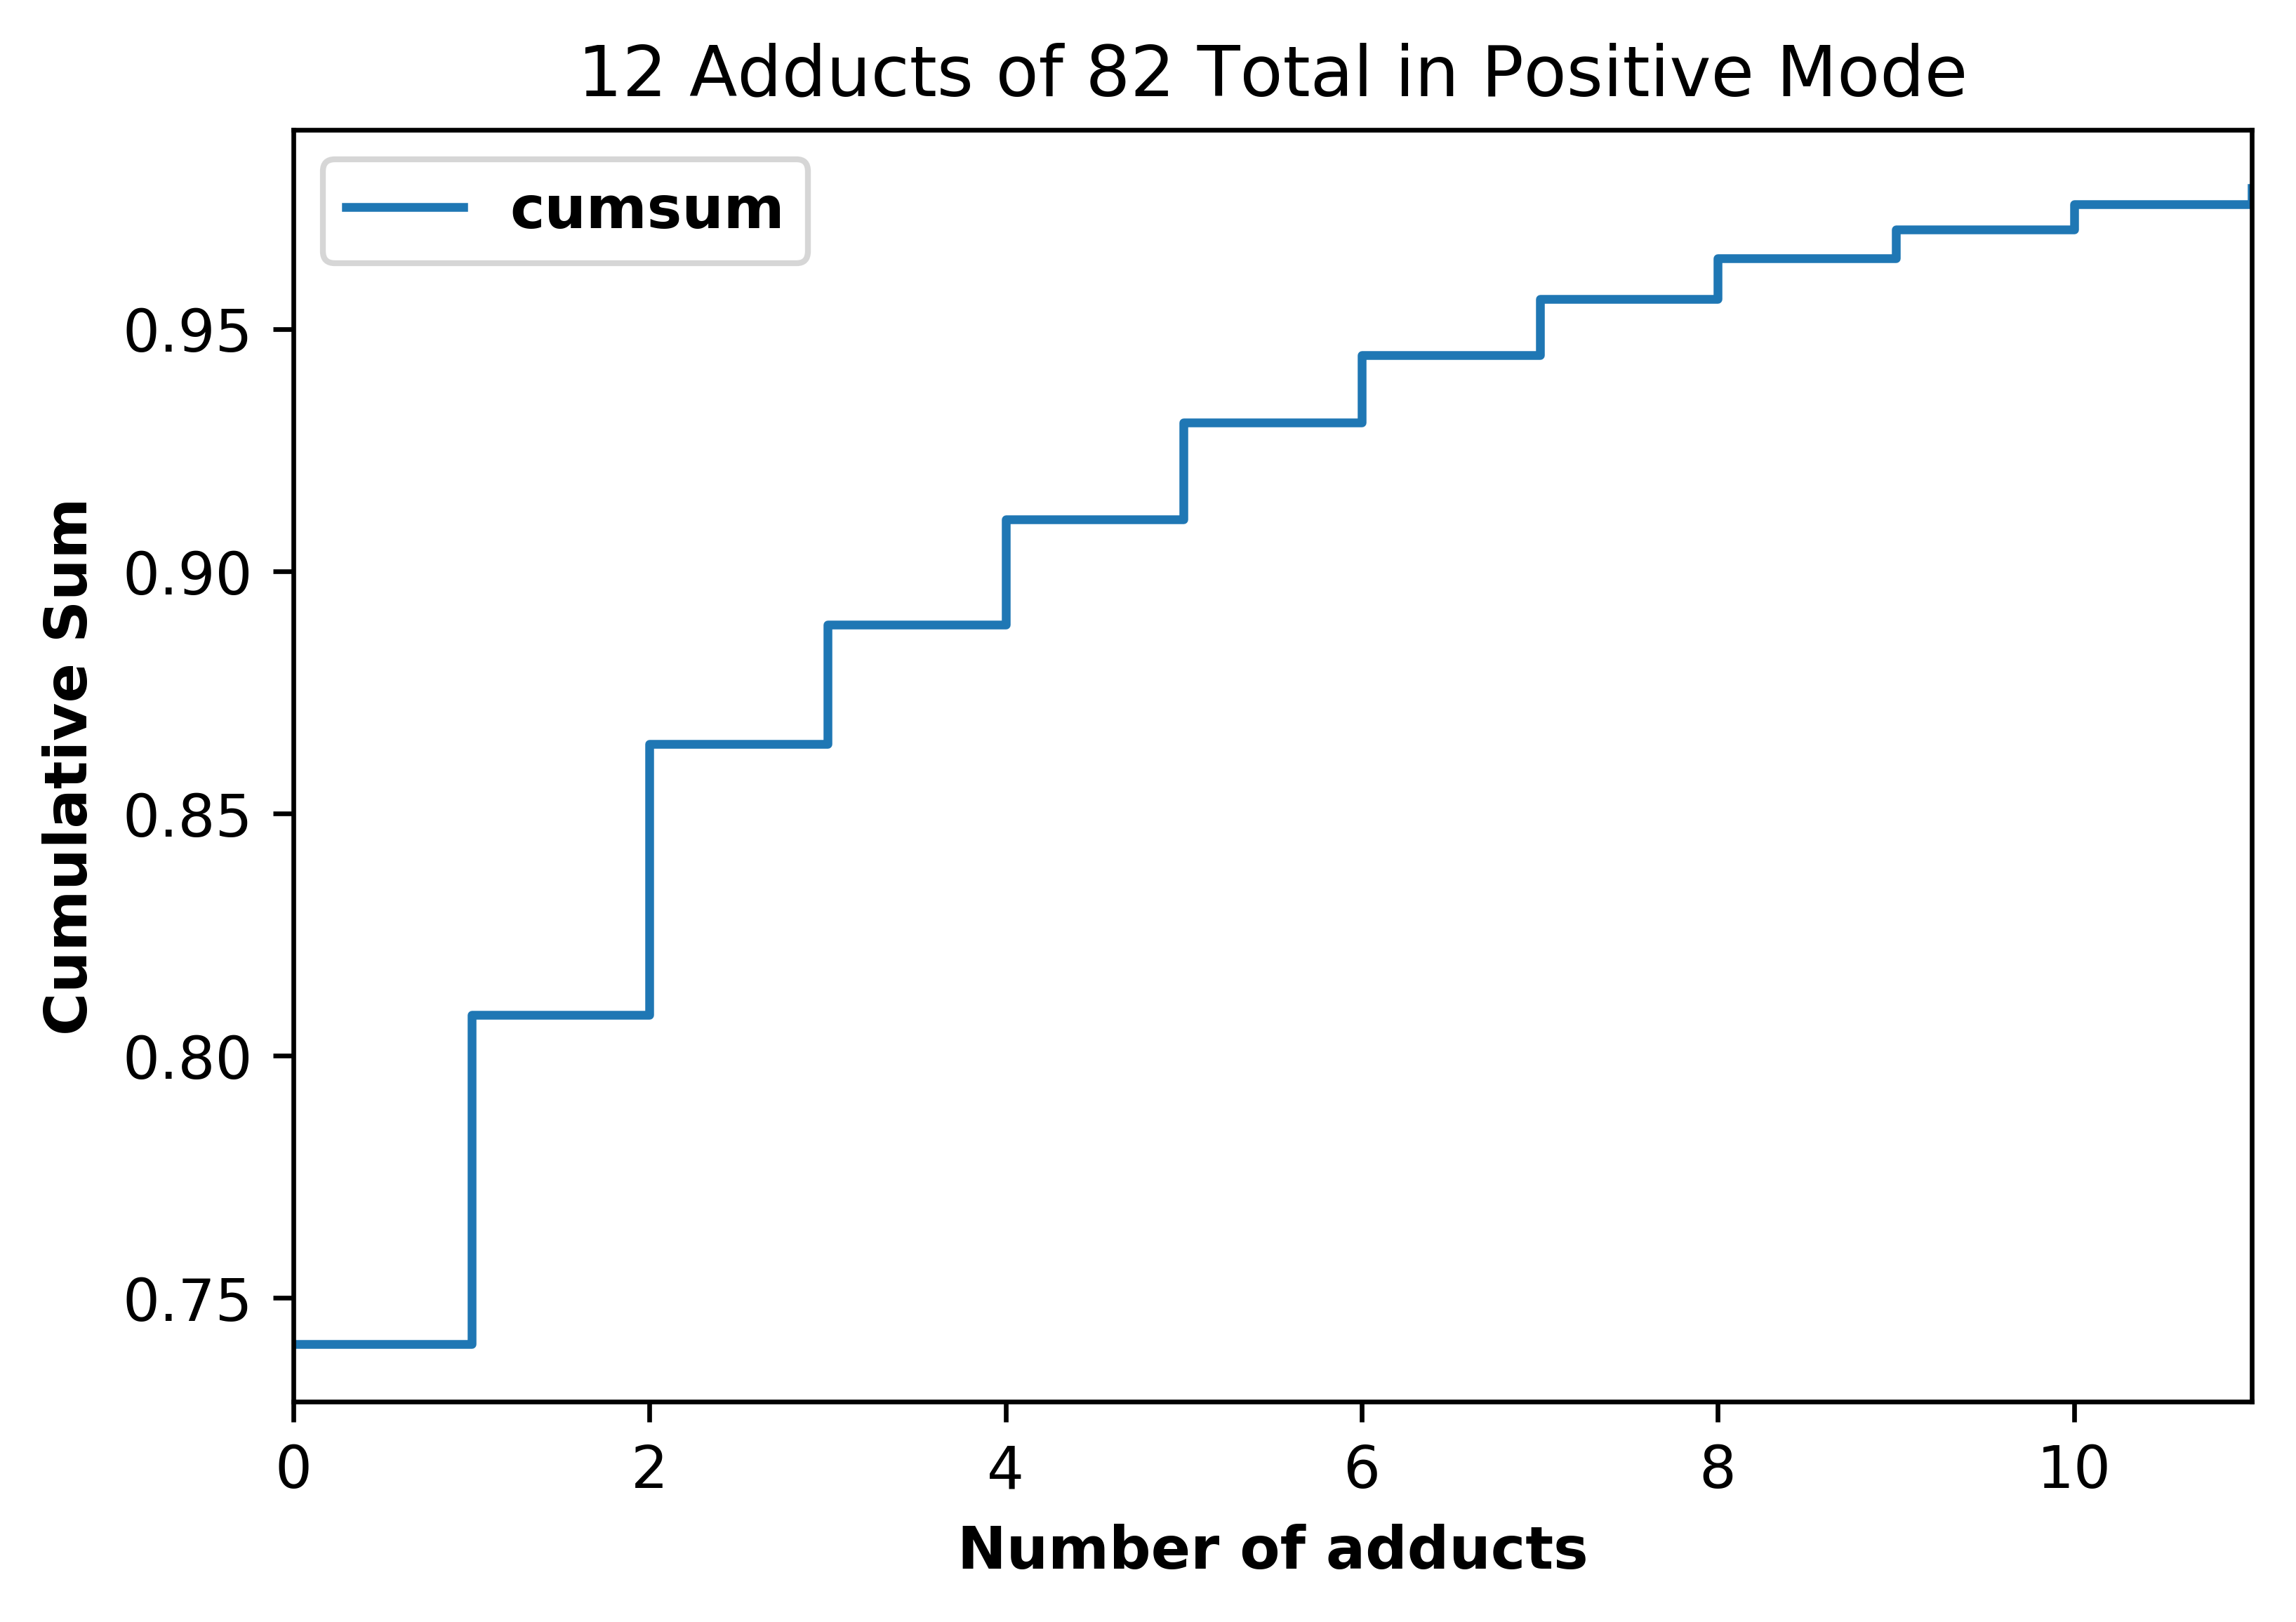

In [224]:
plot_cumulative_percent_coverage(df, 12, 'pos')

      adduct    cumsum index  percent_coverage
0        M-H  0.807167     0          0.807167
1       2M-H  0.865560     1          0.058394
2       M-2H  0.922869     2          0.057309
3       M+Cl  0.947567     3          0.024697
4     M+HCO2  0.959886     4          0.012319
5       M-3H  0.965996     5          0.006111
6       3M-H  0.969761     6          0.003764
7       M+OH  0.973492     7          0.003732
8      M-CH3  0.977191     8          0.003699
9   M+CH3COO  0.980819     9          0.003627
10       M+H  0.983936    10          0.003117
11    M-H+Cl  0.986230    11          0.002294


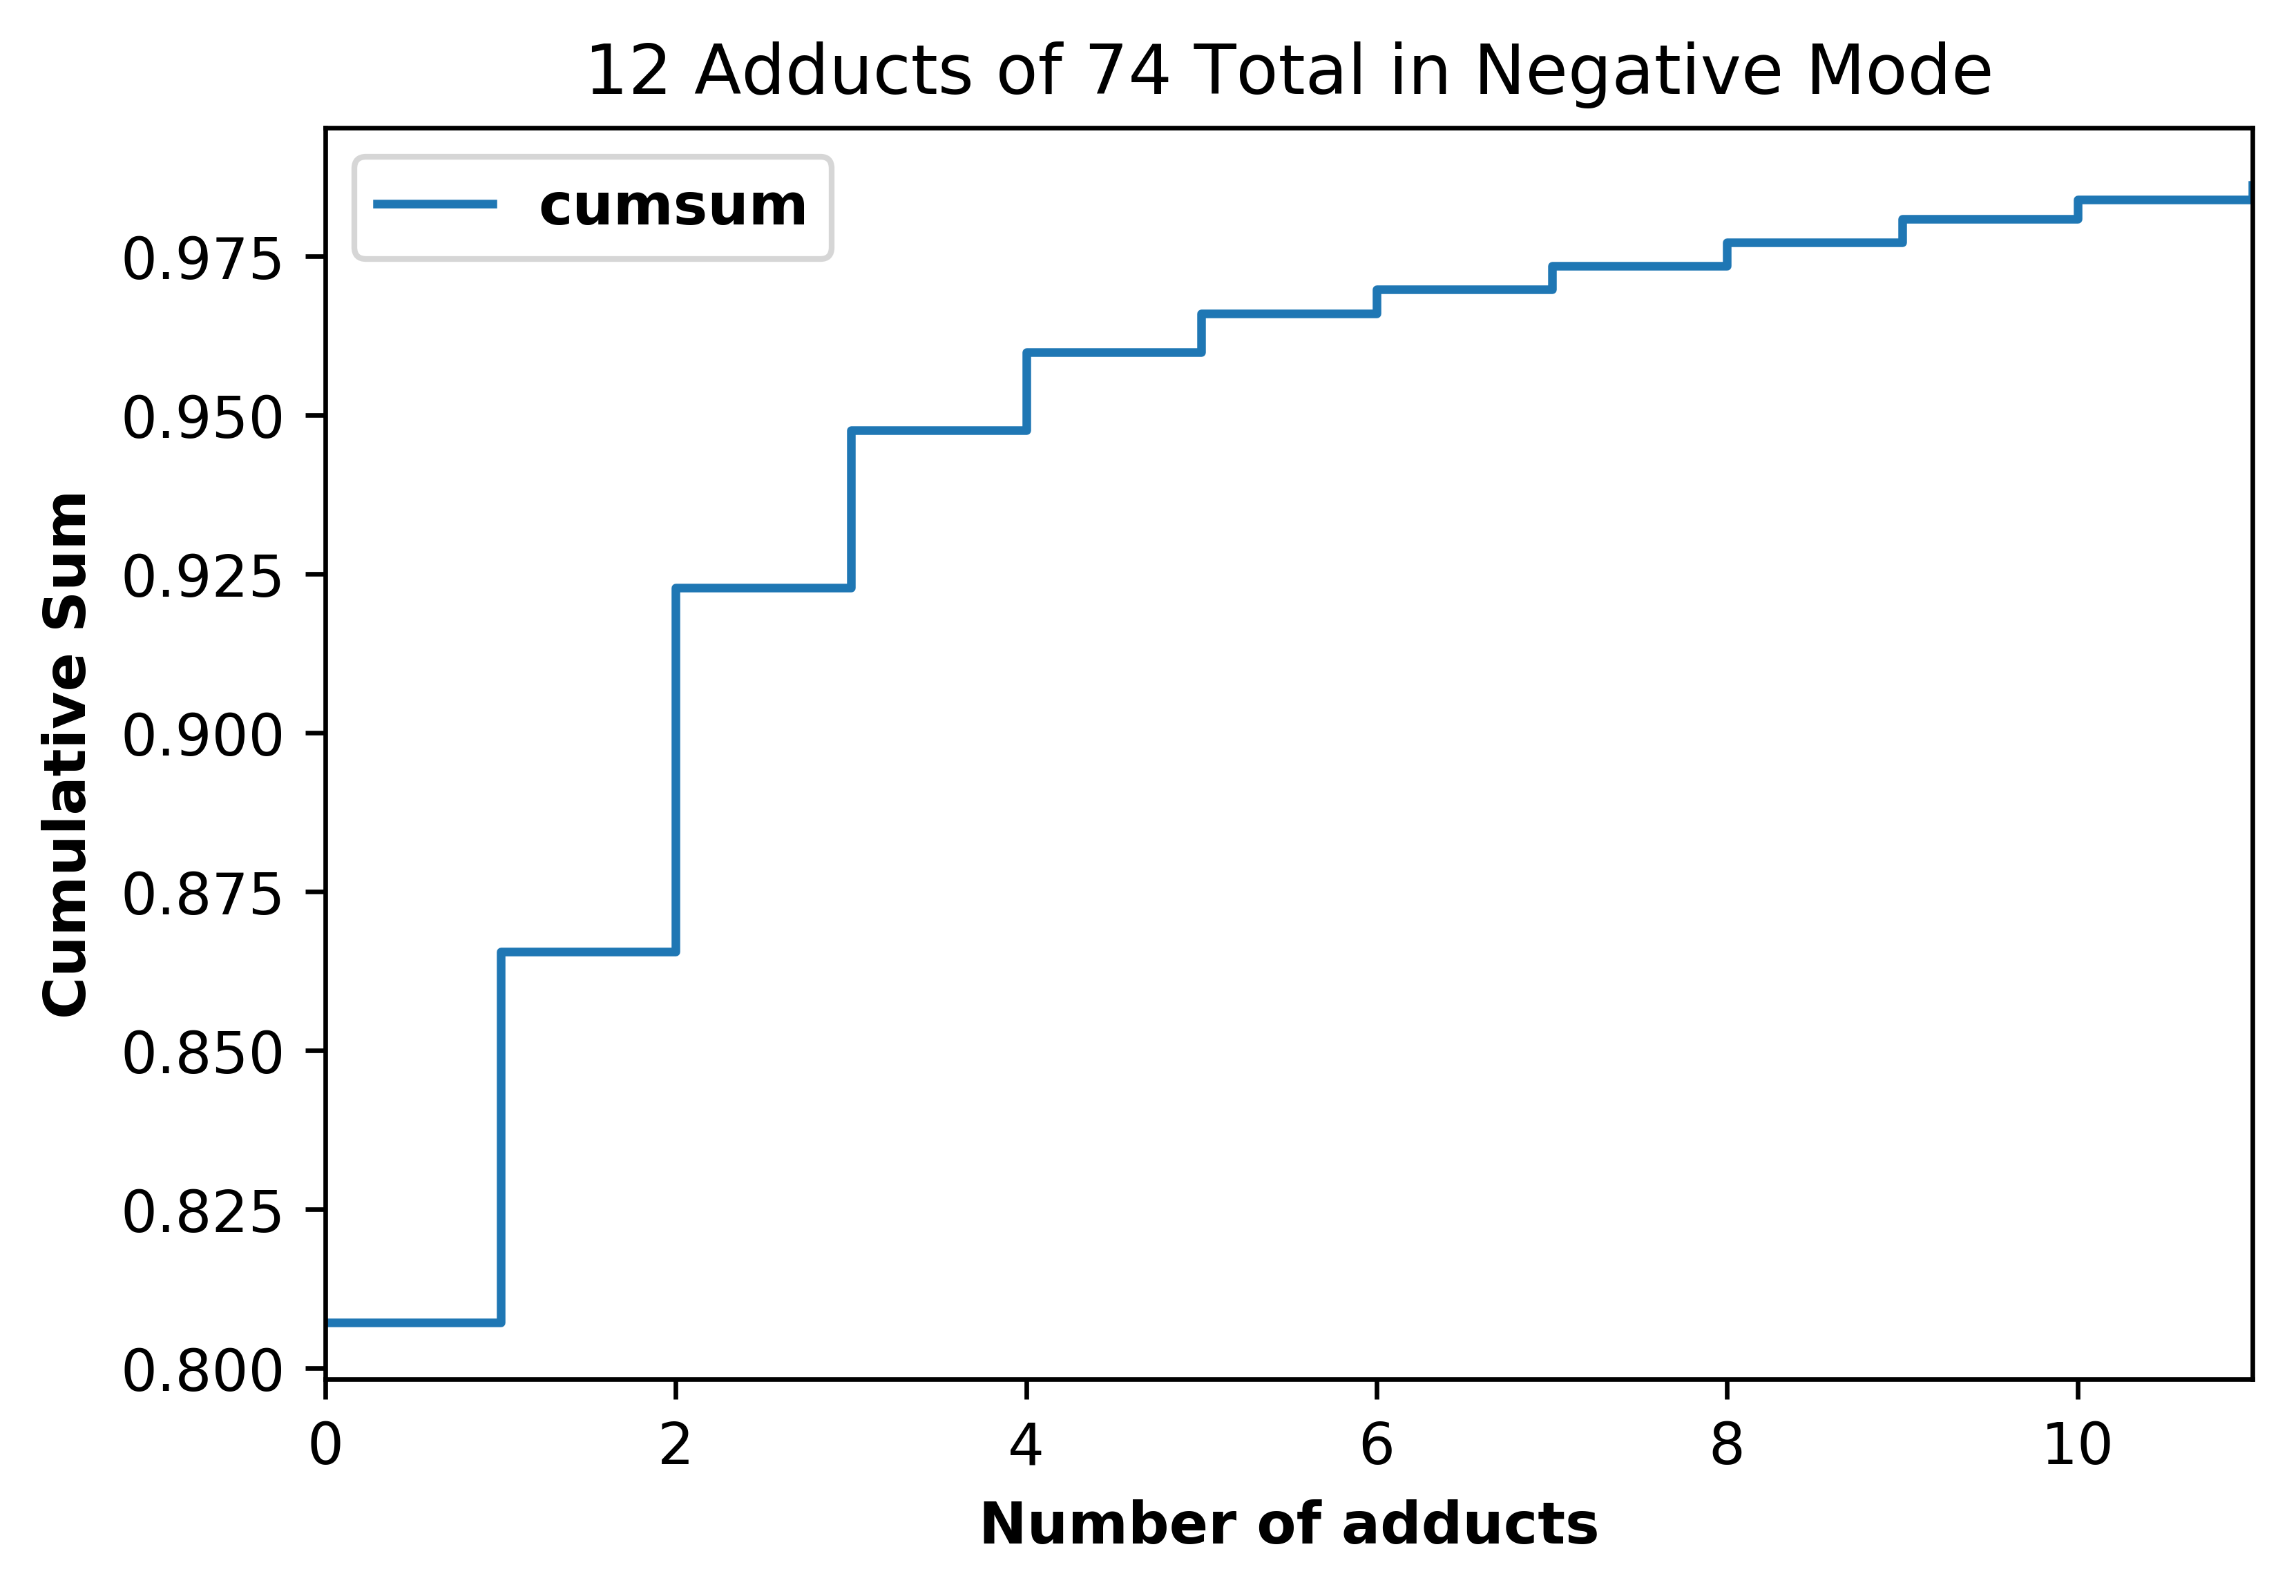

In [225]:
plot_cumulative_percent_coverage(df, 12, 'neg')

Using positive and negative
         adduct    cumsum index  percent_coverage
0           M+H  0.581502     0          0.581502
1           M-H  0.755513     1          0.174011
2          M+Na  0.808774     2          0.053261
3          M+2H  0.852650     3          0.043876
4          2M+H  0.872007     4          0.019357
5          M+3H  0.889074     5          0.017067
6         M+NH4  0.904751     6          0.015677
7          2M-H  0.917340     7          0.012589
8          M-2H  0.929694     8          0.012355
9          M+4H  0.940632     9          0.010937
10          M+K  0.949736    10          0.009104
11         M+5H  0.956317    11          0.006581
12         M+Cl  0.961641    12          0.005324
13        M+H-H  0.966224    13          0.004583
14         M+6H  0.970368    14          0.004144
15       M+HCO2  0.973024    15          0.002656
16        M+H+K  0.975671    16          0.002647
17         M+7H  0.977803    17          0.002132
18       M+H+Na  0.979

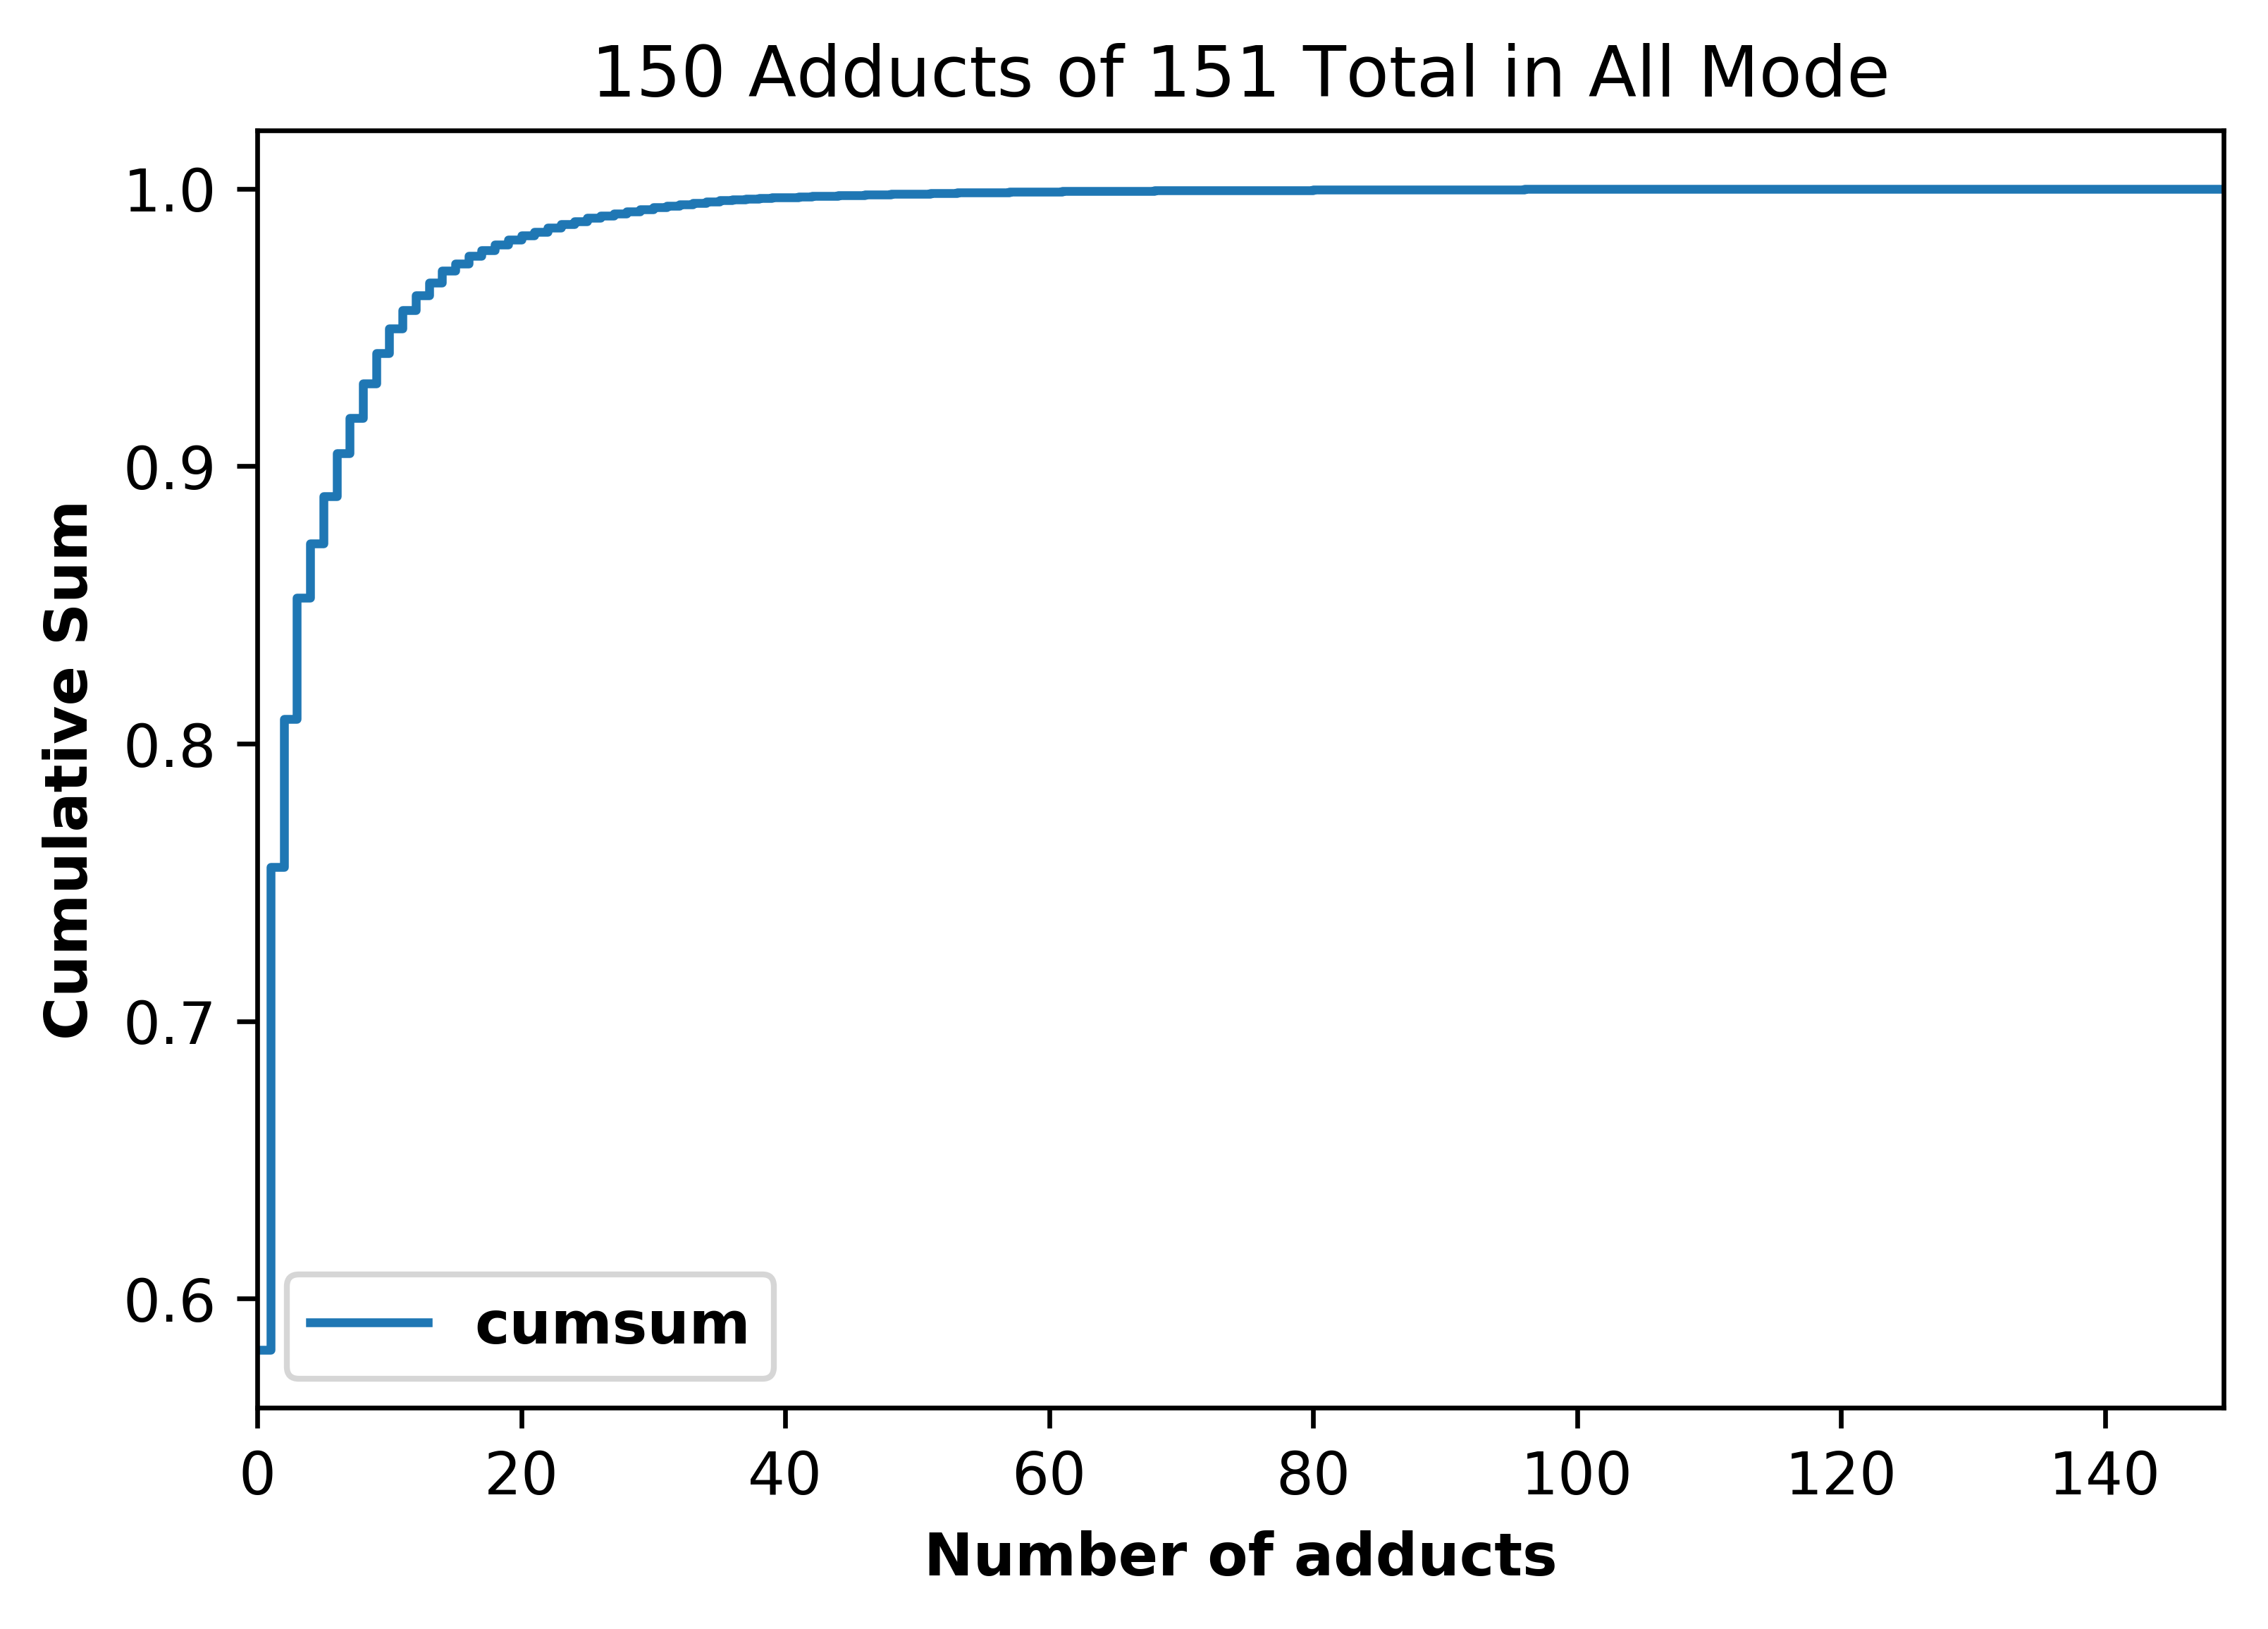

In [200]:
plot_cumulative_percent_coverage(df, 1, 'x')

In [201]:
all_df = cumulative_percent_coverage(df, 3000, 'x')
all_df.head()

Using positive and negative


,adduct,cumsum,index,percent_coverage
0,M+H,0.581502,0,0.581502
1,M-H,0.755513,1,0.174011
2,M+Na,0.808774,2,0.053261
3,M+2H,0.852650,3,0.043876
4,2M+H,0.872007,4,0.019357


In [202]:
all_df = all_df.set_index('adduct', drop=True)

# Graph charge frequency

In [203]:
def get_bin(mass,bins):
    small = bins[0]
    biggest = bins[-1]
    for ind, big in enumerate(bins[1:]):
        if mass > small and mass < big:
            return small
        elif mass > biggest:
            return biggest
        else:
            small = big

In [204]:
df = full_df.copy()

In [205]:
df['abs_charge'] = [np.absolute(charge) for charge in df['charge']]

In [206]:
bin_width = 100
bins = [bin_width*x for x in range(11)]
df['binNum'] = [get_bin(mass, bins) for mass in df['parent_mass']]

charge_type = 'abs_charge'
c = df.groupby( [ "binNum", charge_type] ).size().to_frame(name = 'counts')
c = (c / c.groupby(level=0).sum())*100 #  scales to 100
df2 = c.reset_index()

#add 0s for each charge type
to_append = []
for binNum in df2['binNum'].drop_duplicates():
    for charge in [1.0*i for i in range(1,len(df.abs_charge.unique())+1)]:
        if charge not in df2.loc[df2['binNum'] == binNum][charge_type].to_list():
            to_append.append([charge, binNum, 0.0])
df_all = pd.concat([df2, pd.DataFrame(to_append, columns=[charge_type,'binNum','counts'])], sort=True)
df_all = df_all.drop_duplicates(subset=['binNum',charge_type]).reset_index(drop=True)
df_all = df_all.sort_values(by=['binNum',charge_type]).reset_index(drop=True)

In [207]:
# to make stacks https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
# row is charge, col is bin
c1 = df_all.counts[df_all['abs_charge'] == 1.0].reset_index(drop=True)
c2 = df_all.counts[df_all['abs_charge'] == 2.0].reset_index(drop=True)
c3 = df_all.counts[df_all['abs_charge'] == 3.0].reset_index(drop=True)
c4 = df_all.counts[df_all['abs_charge'] == 4.0].reset_index(drop=True)
c5 = df_all.counts[df_all['abs_charge'] == 5.0].reset_index(drop=True)
c6 = df_all.counts[df_all['abs_charge'] == 6.0].reset_index(drop=True)
c7 = df_all.counts[df_all['abs_charge'] == 7.0].reset_index(drop=True)
c8 = df_all.counts[df_all['abs_charge'] == 8.0].reset_index(drop=True)
c9 = df_all.counts[df_all['abs_charge'] == 9.0].reset_index(drop=True)

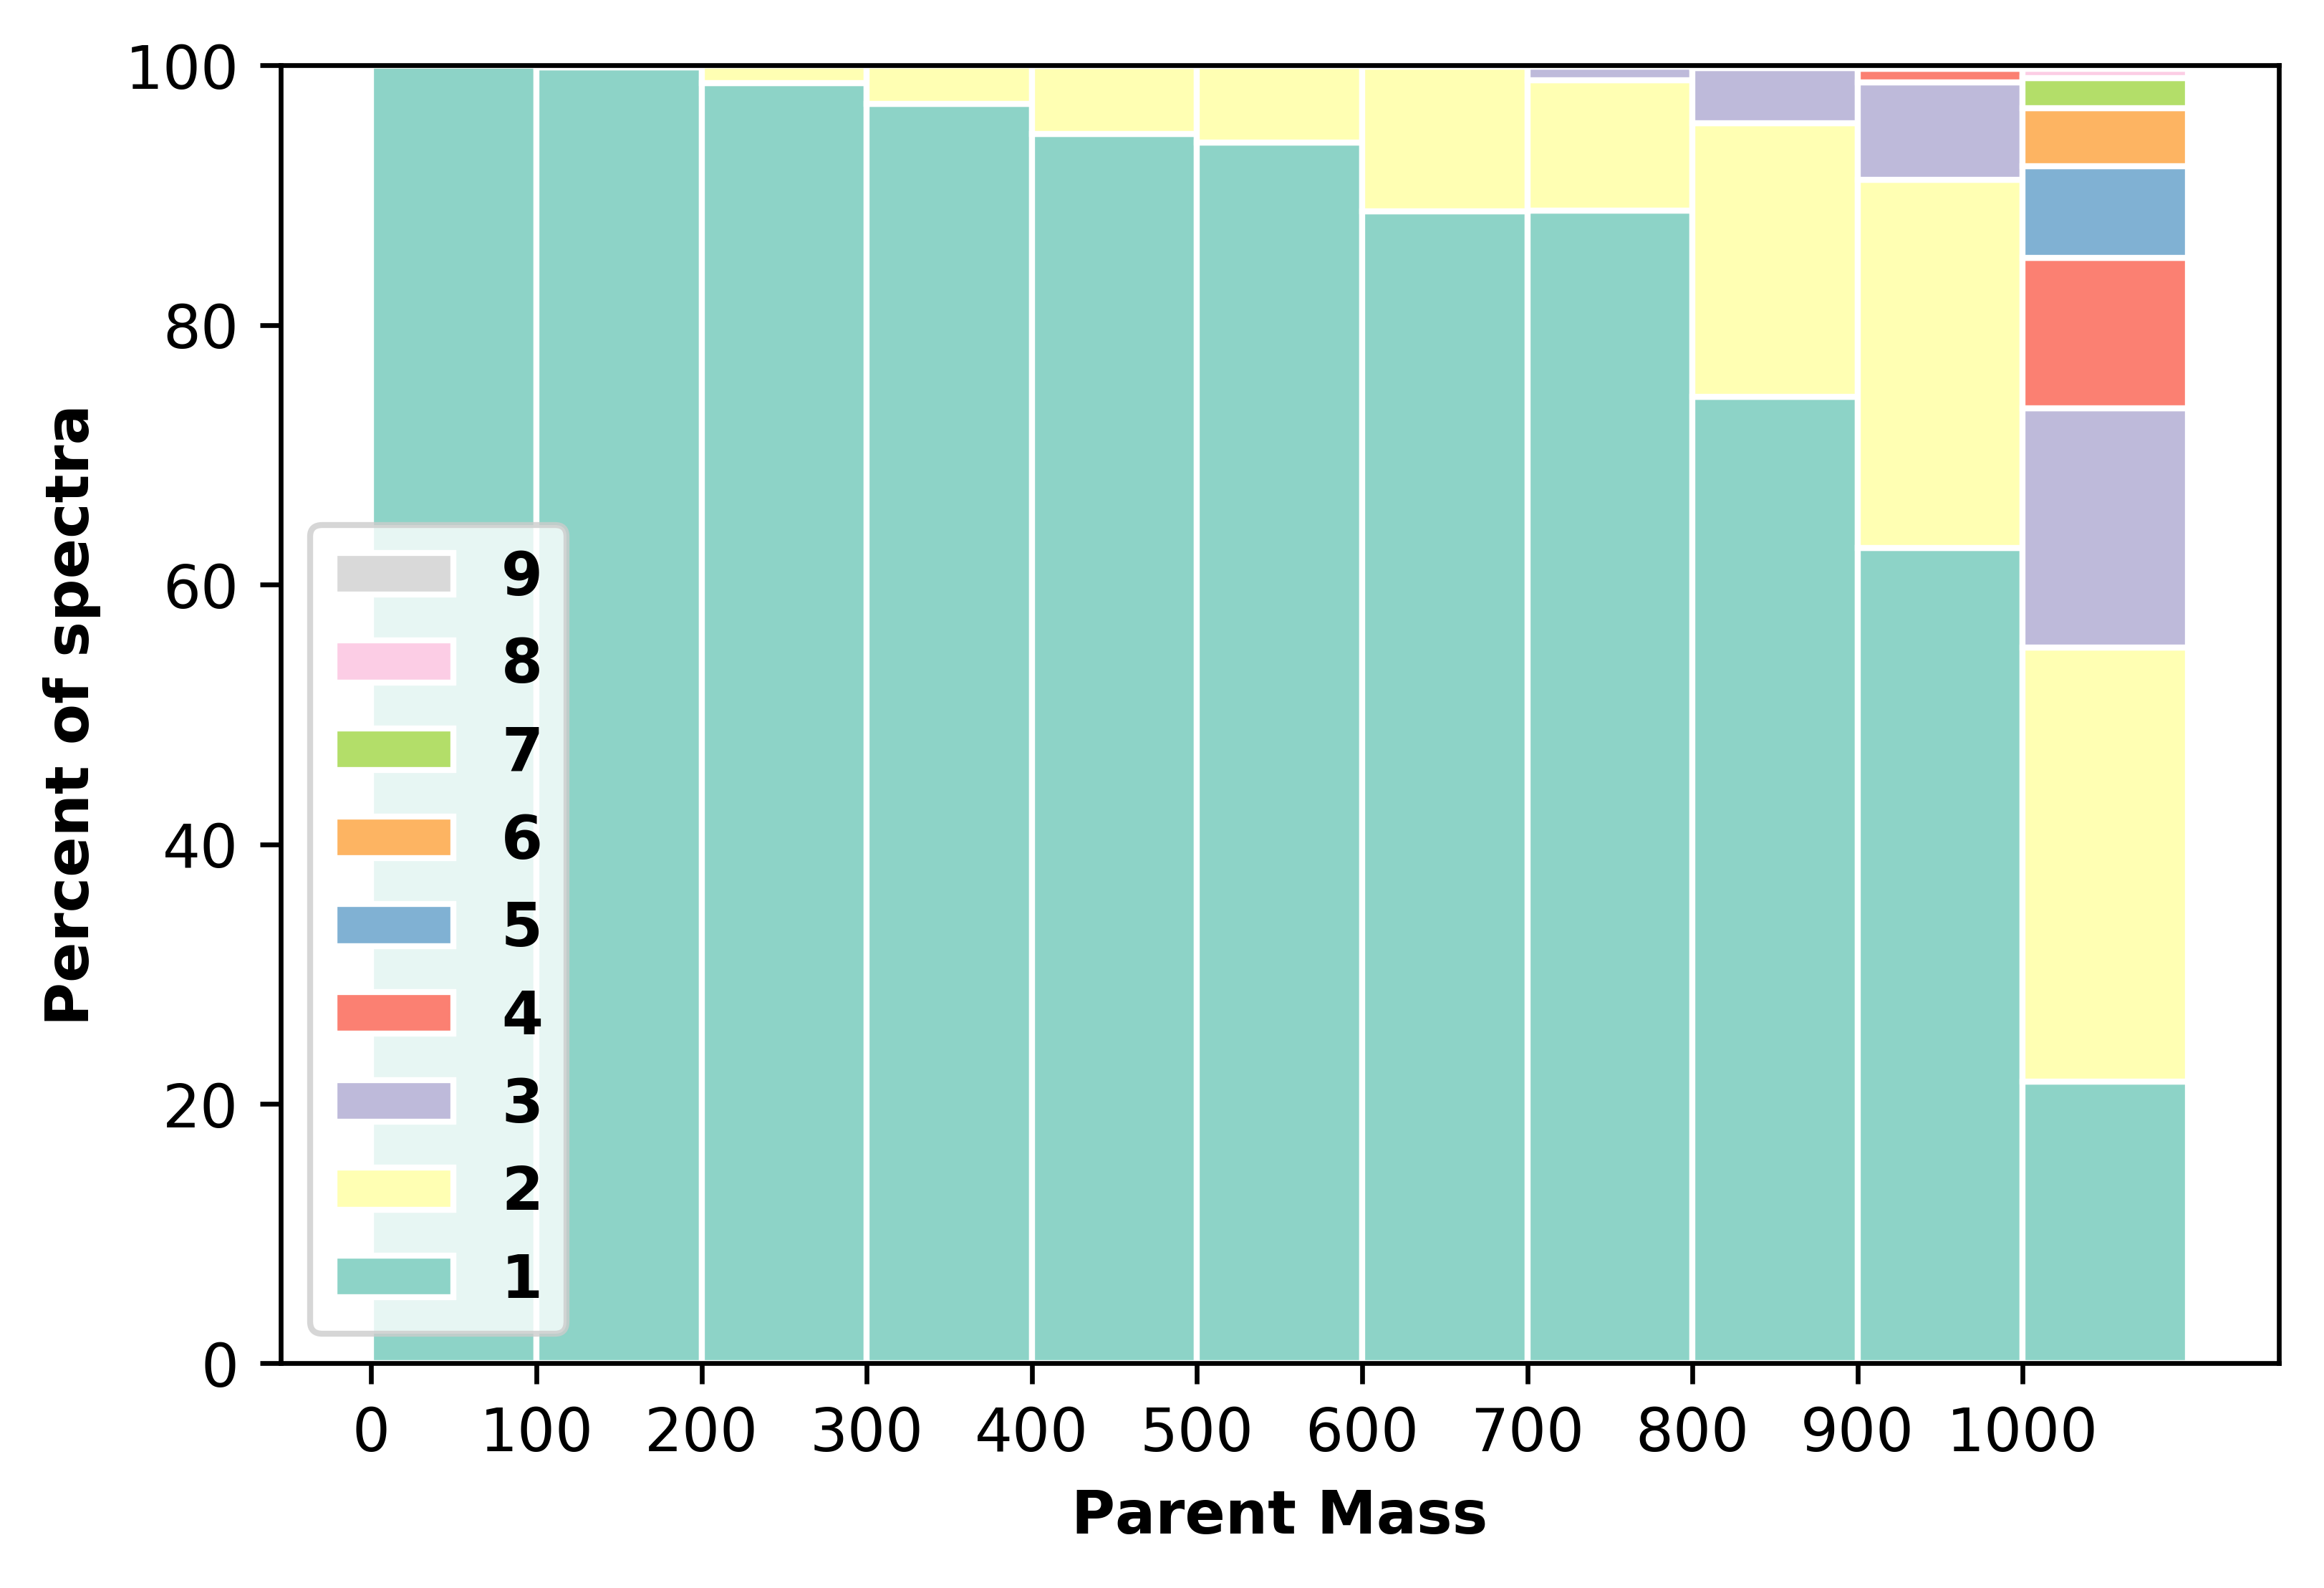

In [208]:
fig1, ax = plt.subplots()

# y-axis in bold
rc('font', weight='bold')

 
# The position of the bars on the x-axis
r = [binNum-100 for binNum in bins]

# Names of group and bar width
names = [str(binNum) for binNum in bins]
barWidth = bin_width


 # Create brown bars
p1 = plt.bar(r, c1, color='#8dd3c7', edgecolor='white', width=barWidth, align='edge')
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(r, c2, bottom=c1, color='#ffffb3', edgecolor='white', width=barWidth, align='edge')
# Create 3rd row
# height of c1+c2, the other bars
h2 = np.add(c1, c2).tolist()
p3 = plt.bar(r, c3, bottom=h2, color='#bebada', edgecolor='white', width=barWidth, align='edge')
# Create 4th row
h3 = np.add(h2, c3).tolist()
p4 = plt.bar(r, c4, bottom=h3, color='#fb8072', edgecolor='white', width=barWidth, align='edge')
# Create 5th row
h4 = np.add(h3, c4).tolist()
p5 = plt.bar(r, c5, bottom=h4, color='#80b1d3', edgecolor='white', width=barWidth, align='edge')
# Create 6th row
h5 = np.add(h4, c5).tolist()
p6 = plt.bar(r, c6, bottom=h5, color='#fdb462', edgecolor='white', width=barWidth, align='edge')
# Create 7th row
h6 = np.add(h5, c6).tolist()
p7 = plt.bar(r, c7, bottom=h6, color='#b3de69', edgecolor='white', width=barWidth, align='edge')
# Create 8th row
h7 = np.add(h6, c7).tolist()
p8 = plt.bar(r, c8, bottom=h7, color='#fccde5', edgecolor='white', width=barWidth, align='edge')
# Create 9th row
h8 = np.add(h7, c8).tolist()
p9 = plt.bar(r, c9, bottom=h8, color='#d9d9d9', edgecolor='white', width=barWidth, align='edge')

# Custom X axis
plt.xticks(r, names, fontweight='normal', ha='center')
plt.yticks(fontweight='normal')
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.tick_params(axis='x',which='major')
plt.xlabel("Parent Mass", fontweight='bold')
plt.ylabel("Percent of spectra", fontweight='bold')
colors = [p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0]]
nums = ['1','2','3','4','5','6','7','8','9']
colors = colors[::-1]
nums = nums[::-1]
plt.legend(colors,nums, loc=3)
#plt.legend([p1[0],p2[0],p3[0],p4[0]],['1','2','3','4',], loc=3)
plt.xticks()
# Show graphic
plt.show()

In [209]:
bins

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [210]:
plt.close()

# Mass/Charge distribution

In [211]:
df = full_df.copy()

### Looking for how many spectra have a certain charge

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text yticklabel objects>)

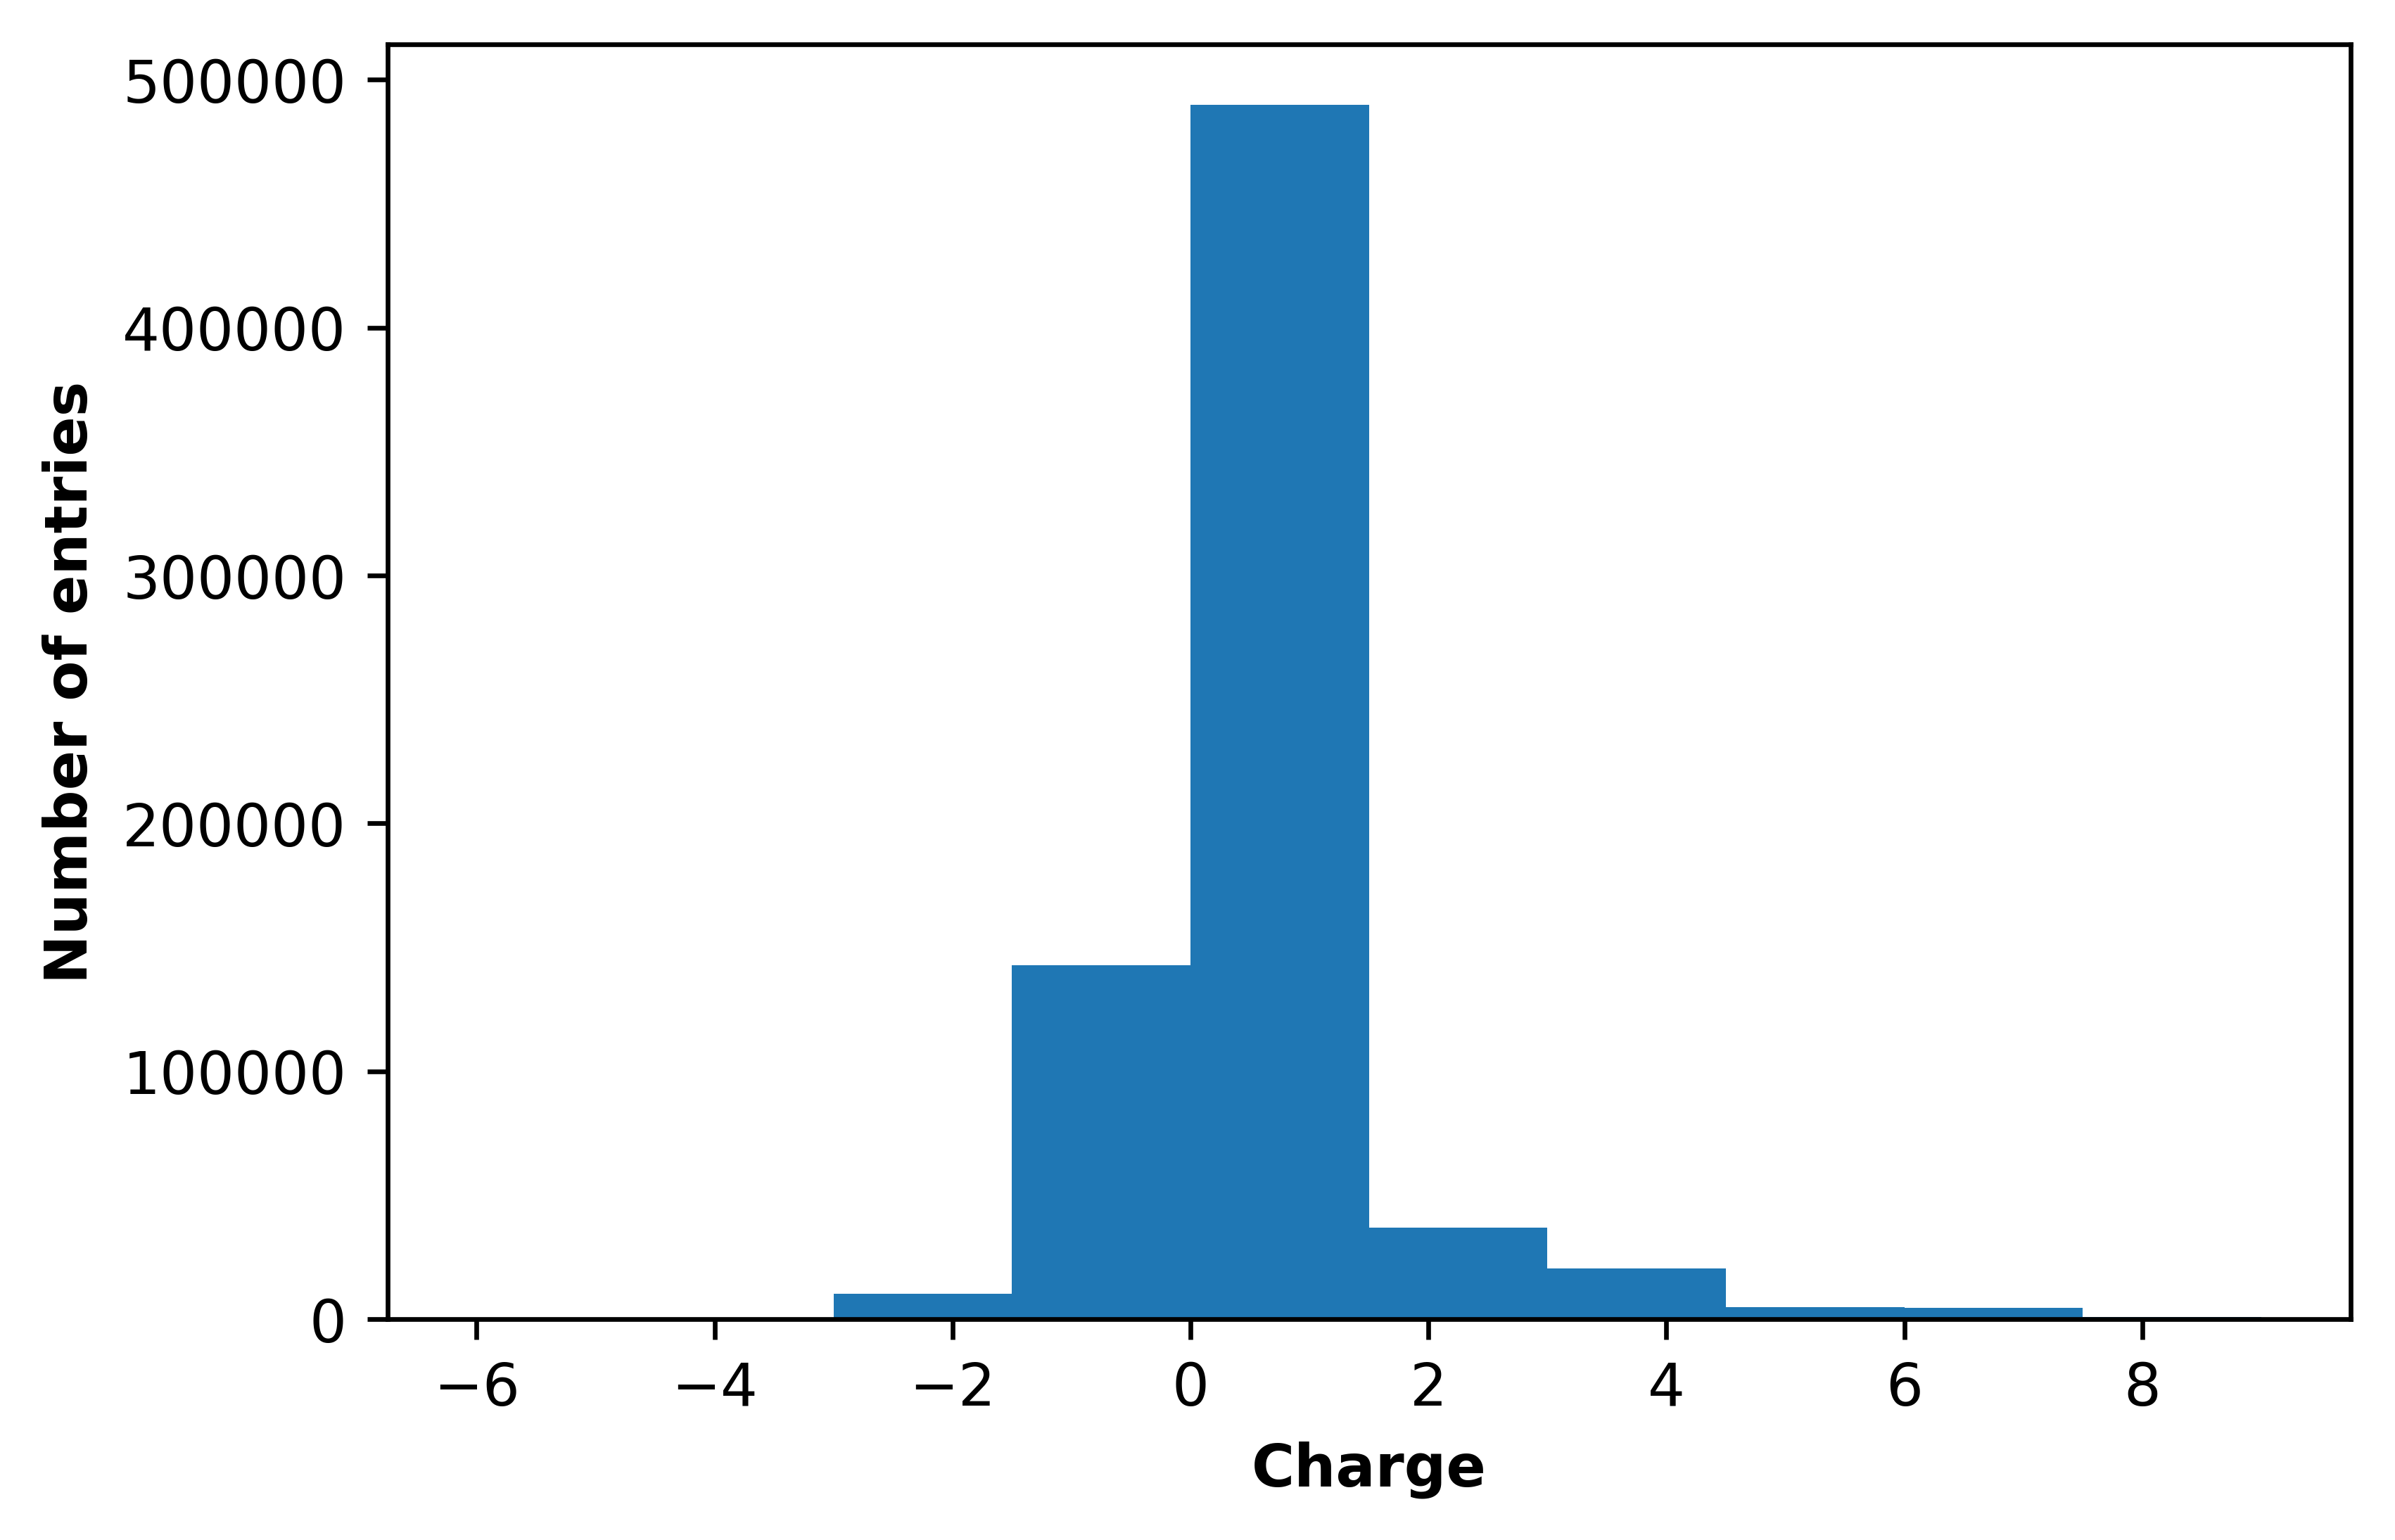

In [212]:
plt.hist(df.charge)
plt.xlabel('Charge', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')

In [213]:
df.charge.value_counts().sort_values()

-5.0        11
-6.0        18
-4.0        41
 9.0       154
 8.0       509
-3.0       973
 7.0      1513
 6.0      2941
 5.0      4671
 4.0      7763
-2.0      9163
 3.0     12667
 2.0     36721
-1.0    142807
 1.0    489819
Name: charge, dtype: int64

### Number of molecules with at least one spectra at that charge

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text yticklabel objects>)

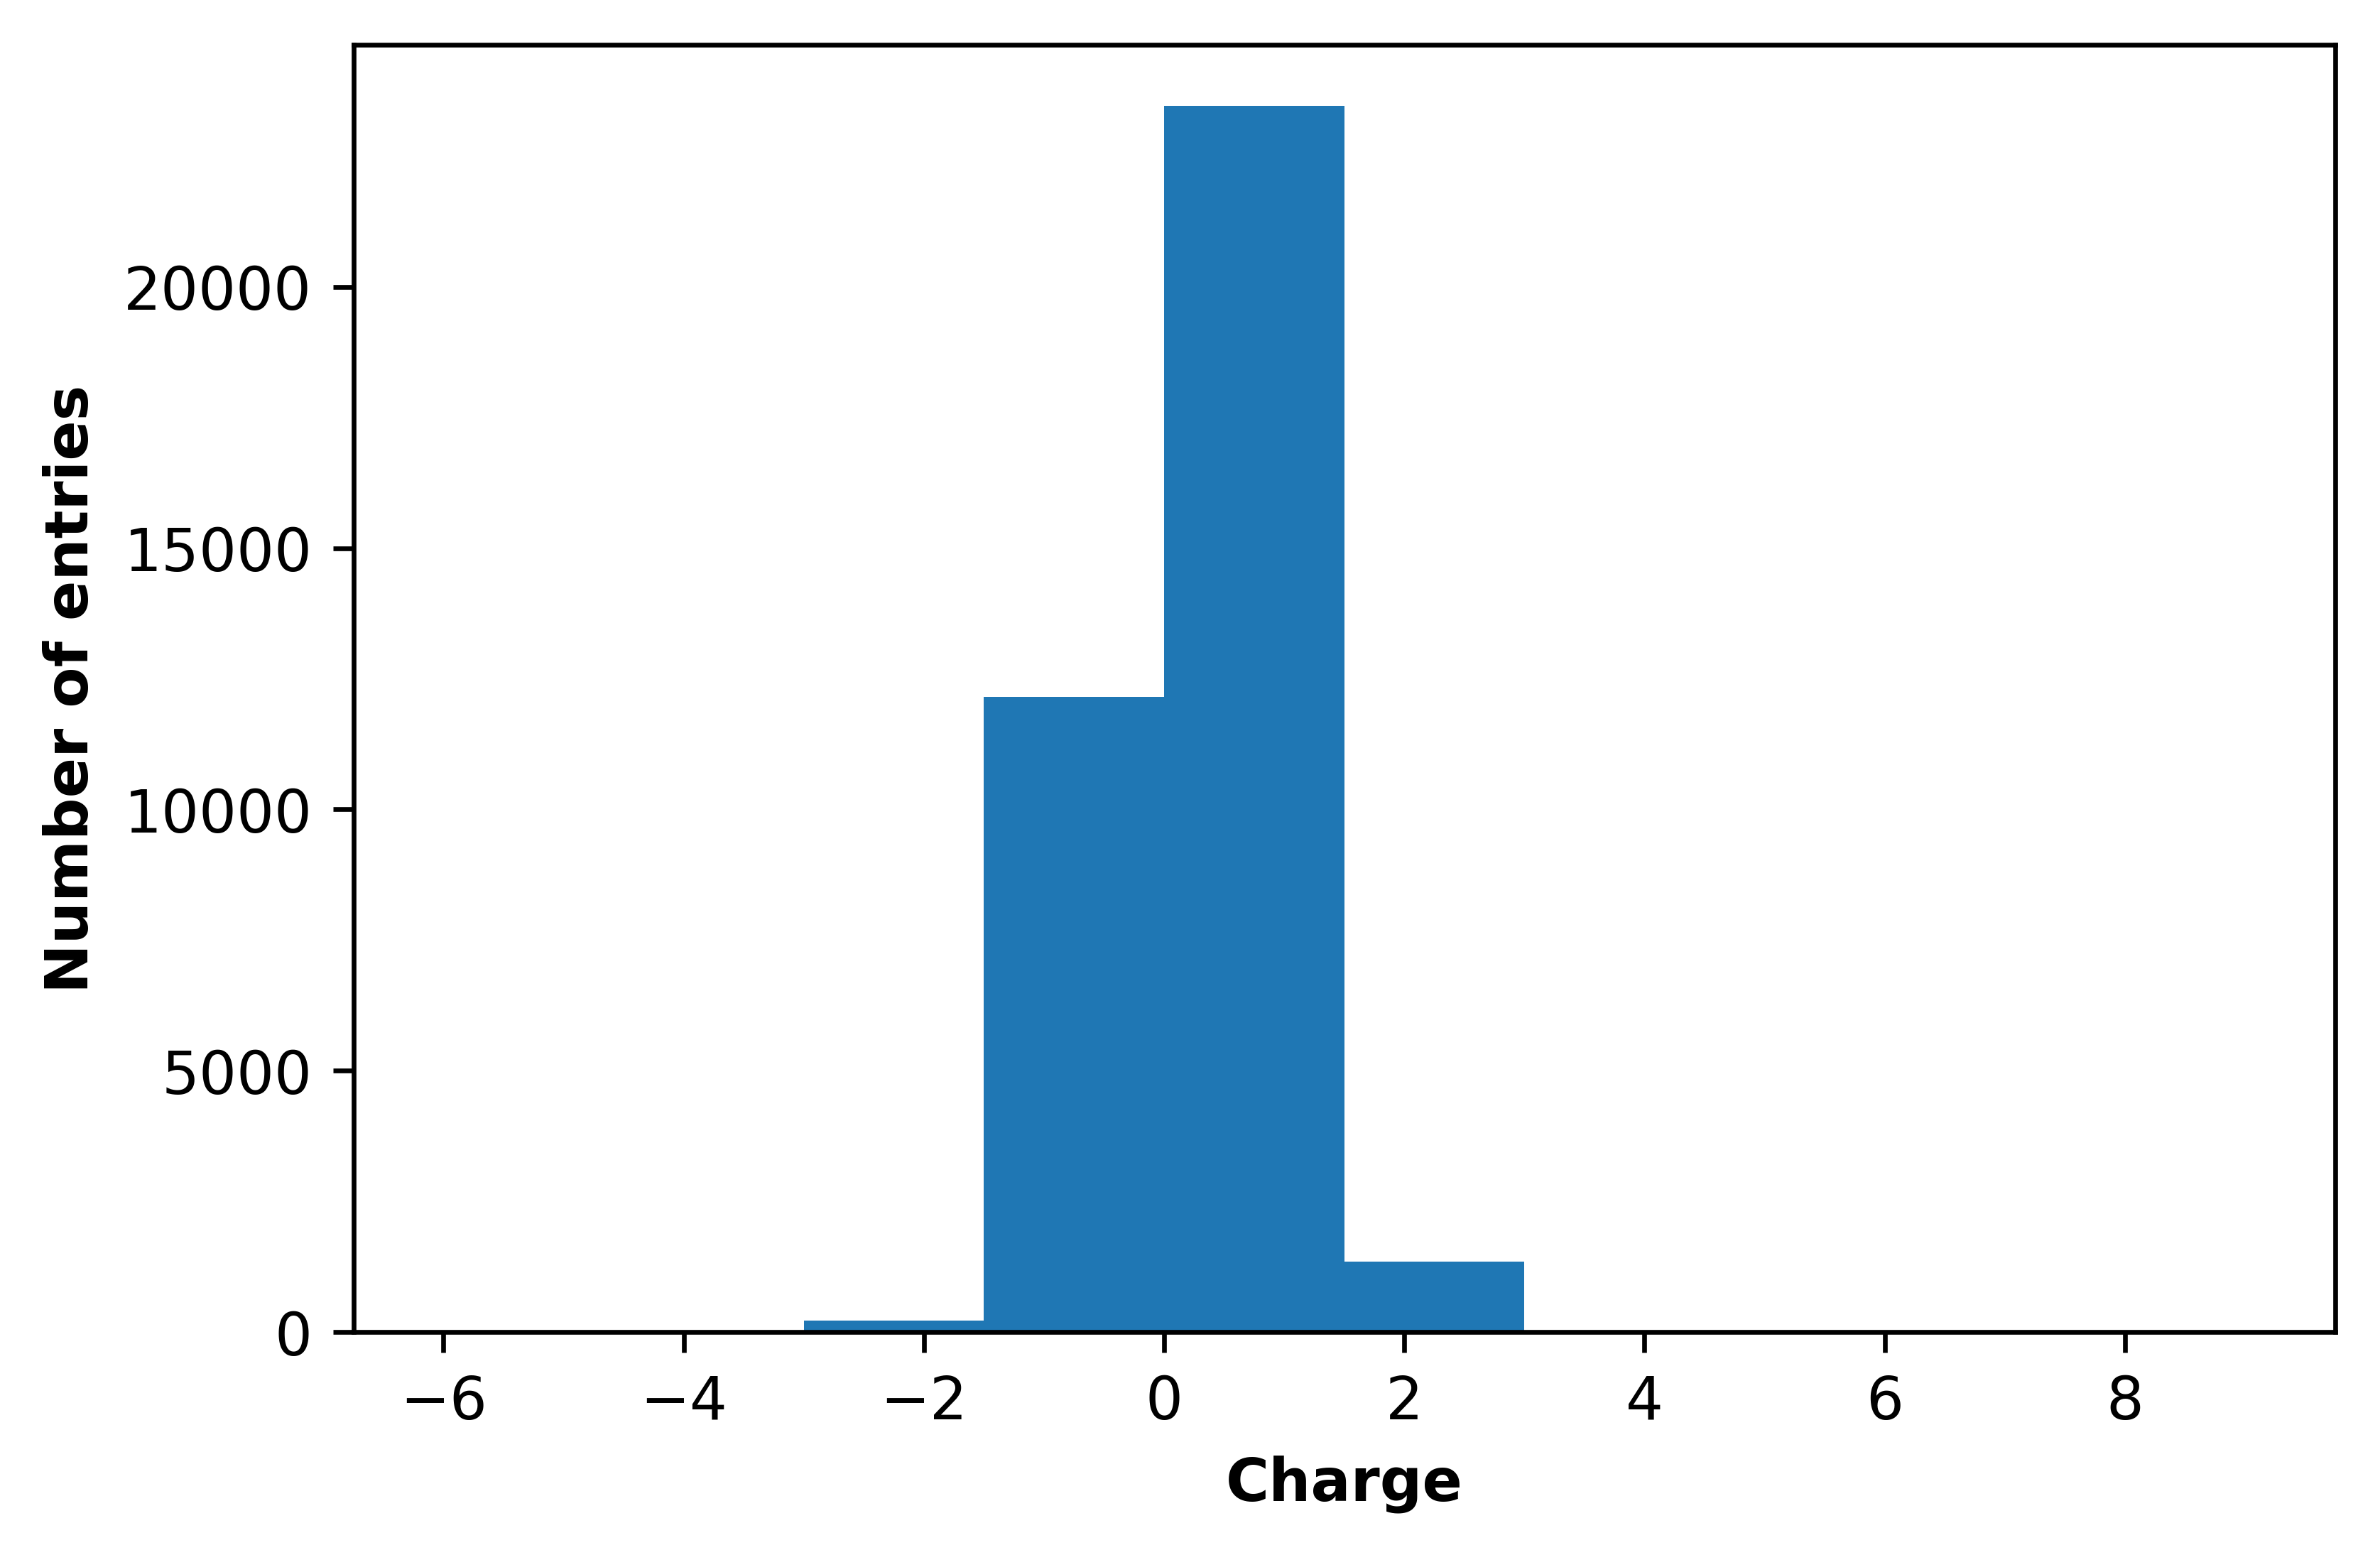

In [214]:
plt.hist(df.drop_duplicates(subset=['inchikey','charge']).charge)
plt.xlabel('Charge', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')

In [215]:
df.drop_duplicates(subset=['inchikey','charge']).charge.value_counts()

 1.0    23463
-1.0    12150
 2.0     1340
-2.0      204
 3.0       13
-3.0        5
-4.0        2
 7.0        1
-6.0        1
 6.0        1
-5.0        1
 5.0        1
 9.0        1
 8.0        1
 4.0        1
Name: charge, dtype: int64

In [216]:
### Number of molecules (by smile?)

In [217]:
df.drop_duplicates(subset=['inchikey','charge']).charge.value_counts().sort_values()

 7.0        1
-6.0        1
 6.0        1
-5.0        1
 5.0        1
 9.0        1
 8.0        1
 4.0        1
-4.0        2
-3.0        5
 3.0       13
-2.0      204
 2.0     1340
-1.0    12150
 1.0    23463
Name: charge, dtype: int64

### Looking at Mass distribution under 2000 Da (small molecules)

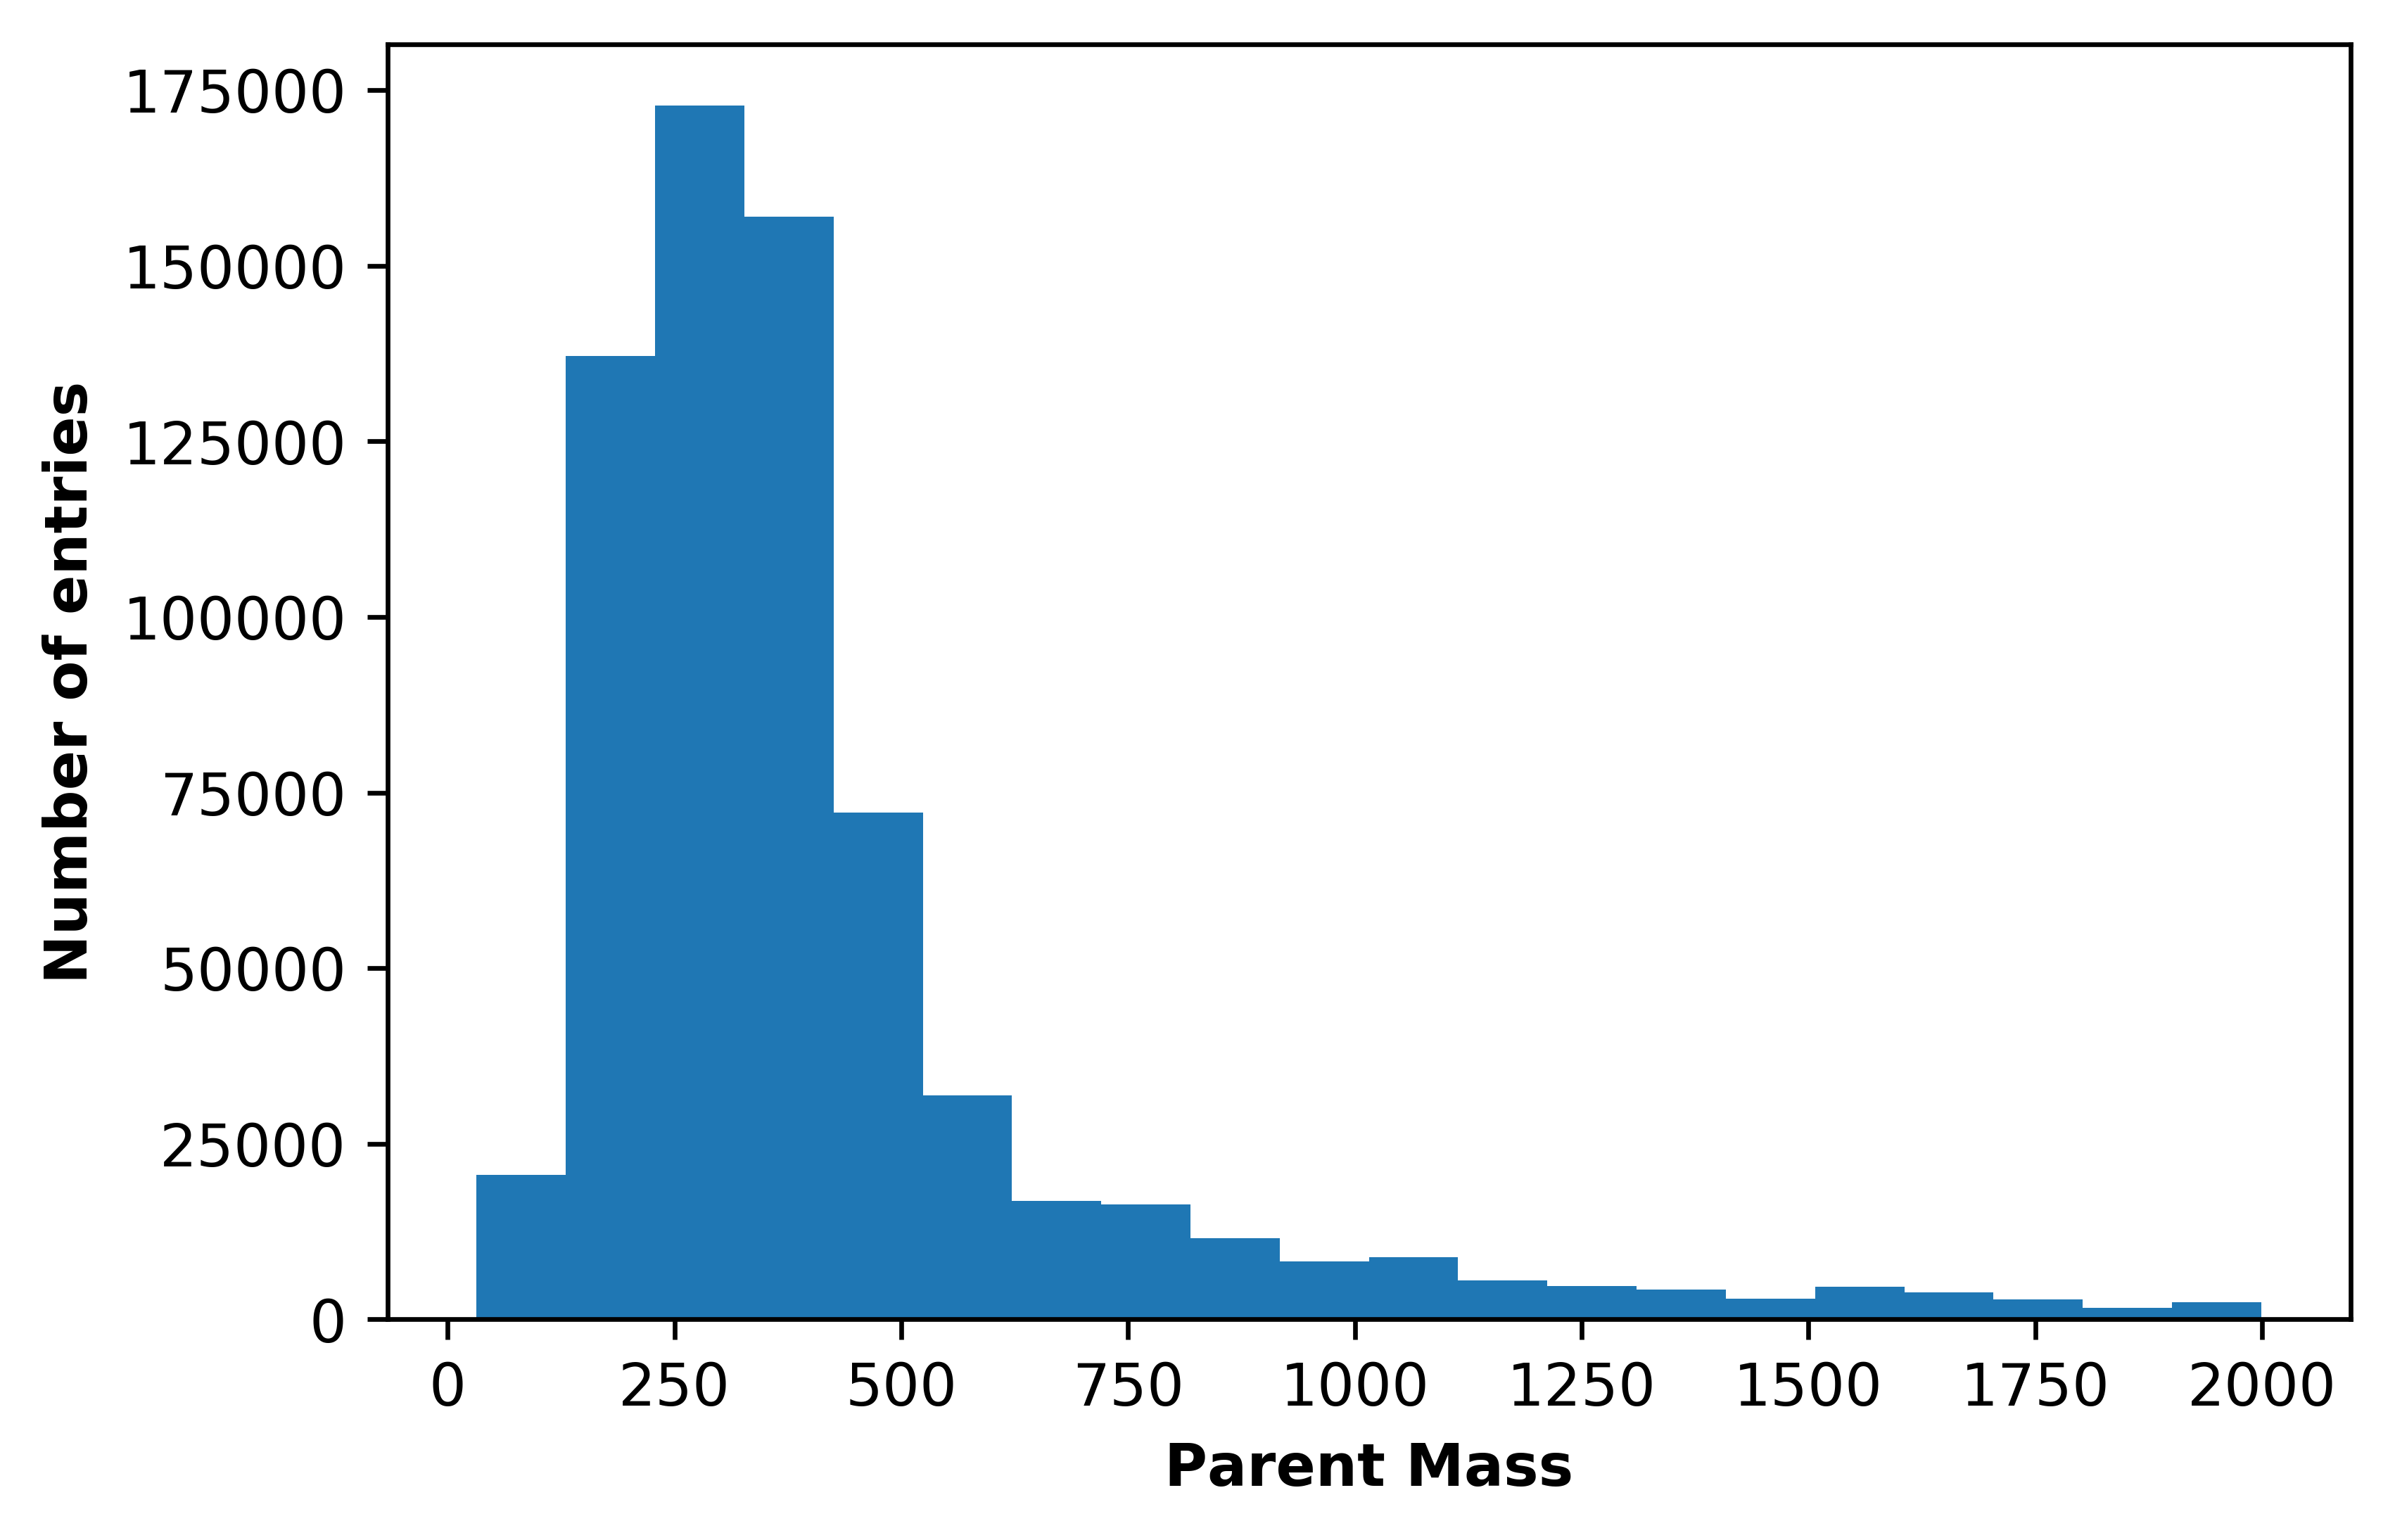

In [218]:
plt.hist(df[df.parent_mass<2000].parent_mass, bins=20)
plt.xlabel('Parent Mass', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')
plt.show()

### Looking at mass distribution of multiply-charged adducts in parent mols under 2000 Da

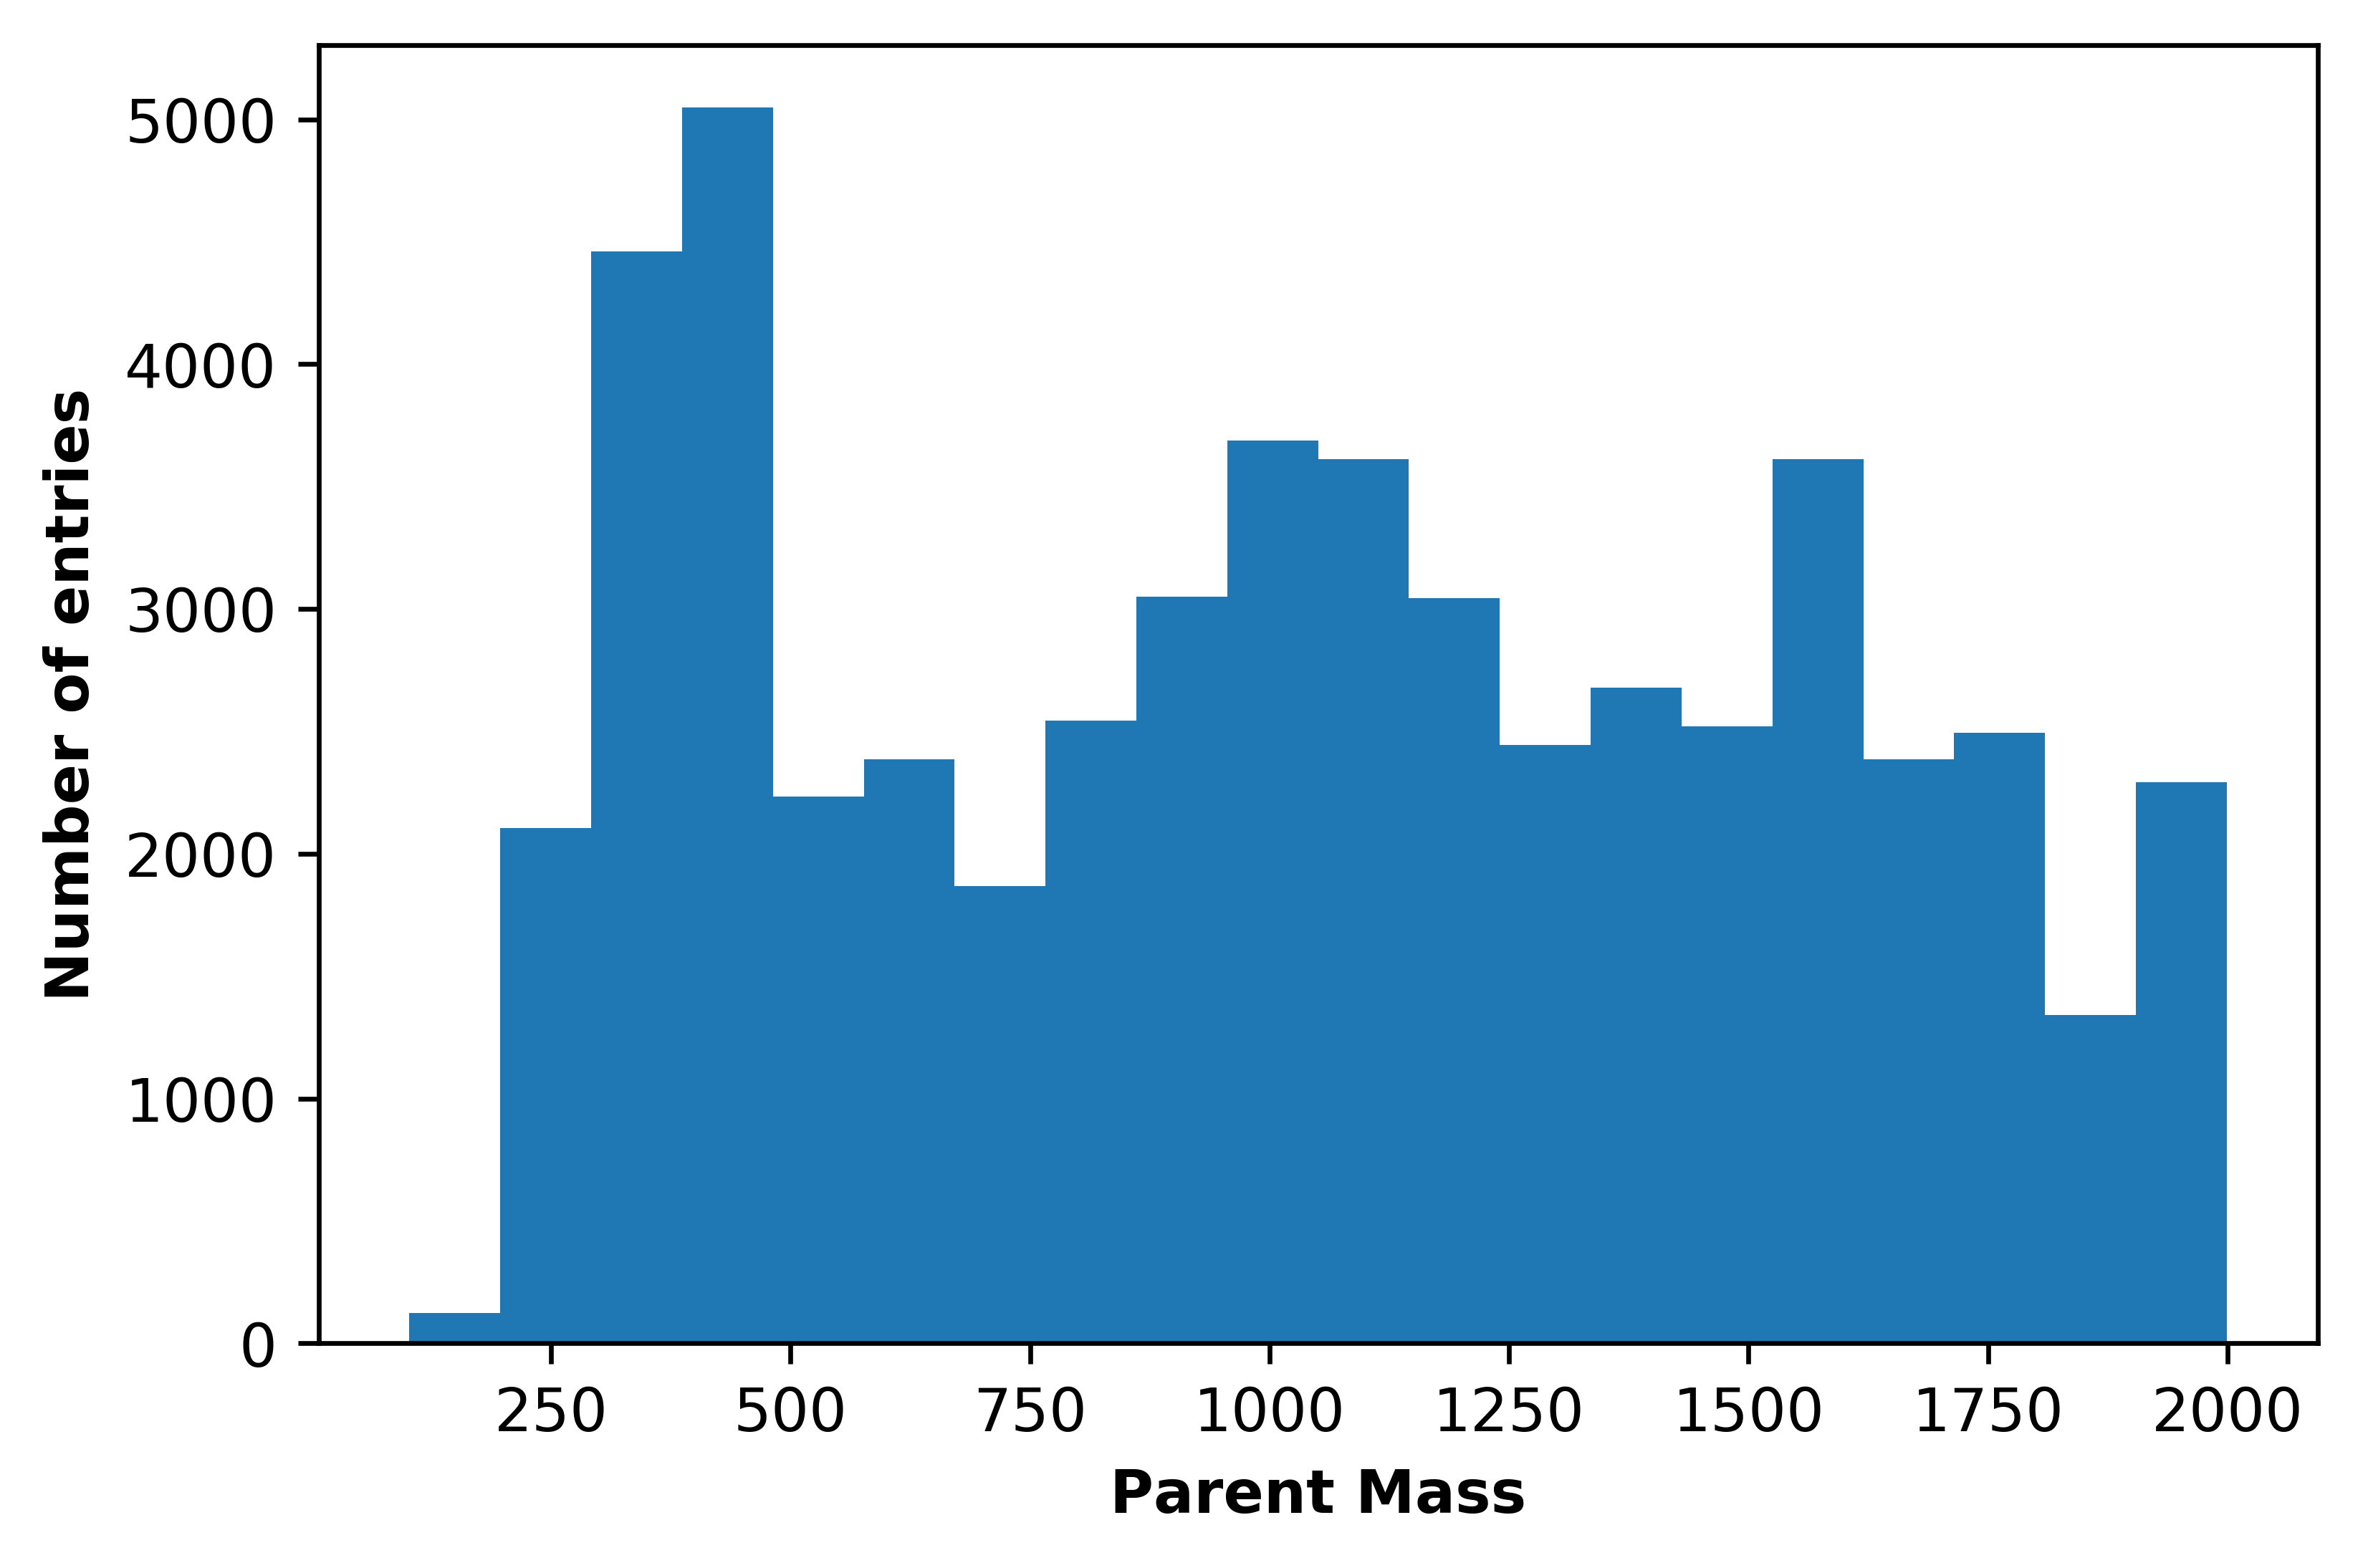

In [219]:
plt.hist(df[(df.parent_mass<2000) & (abs(df.charge)>1)].parent_mass, bins=20)
plt.xlabel('Parent Mass', weight='bold')
plt.ylabel('Number of entries', weight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')
plt.show()

In [220]:
df.drop_duplicates(subset='inchikey')

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
0,M+H,981.400000,3-Des-Microcystein_LR,NaN,nan,NaN,NaN,gnps,M+H,1.0
331,M+Na,1030.710000,Surfactin C13,NaN,InChI=1S/C51H89N7O13/c1-28(2)18-16-14-13-15-17...,CC(C)CCCCCCCC1CC(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC...,NaN,gnps,M+Na,1.0
393,M+H,304.226000,dehydrohaliclocyclin F dial,NaN,InChI=1S/C19H30NO2/c21-17-11-5-2-1-3-7-13-19-1...,O=C([H])CCCCCCCC1=CC=CC=[N+]1CCCCCC([H])=O,NaN,gnps,M+H,1.0
589,M+H,272.230000,tBuO-val-hexanoate (tert-butyl hexanoylvalinate),NaN,InChI=1S/C15H29NO3/c1-7-8-9-10-12(17)16-13(11(...,CCCCCC(NC(C(C)C)C(OC(C)(C)C)=O)=O,NaN,gnps,M+H,1.0
742,M+Na,796.458000,Phosphatidylethanolamine (22:0/16:1) Abbr: BPoPE,NaN,InChI=1S/C43H84NO8P/c1-3-5-7-9-11-13-15-17-18-...,NaN,NaN,gnps,M+Na,1.0
743,M+K,702.452000,Phosphatidylethanolamine (15:0/15:0) Abbr: Di-...,NaN,InChI=1S/C35H70NO8P/c1-3-5-7-9-11-13-15-17-19-...,NaN,NaN,gnps,M+K,1.0
745,M+H,744.488000,Phosphatidylethanolamine (20:1/16:1) Abbr: GPoPE,NaN,InChI=1S/C41H78NO8P/c1-3-5-7-9-11-13-15-17-18-...,NaN,NaN,gnps,M+H,1.0
747,M+K,778.448000,Phosphatidylethanolamine (20:3/16:1) Abbr: hLP...,NaN,InChI=1S/C41H74NO8P/c1-3-5-7-9-11-13-15-17-18-...,NaN,NaN,gnps,M+K,1.0
749,M+K,780.481000,Phosphatidylethanolamine (20:3/16:0) Abbr: hLPPE,NaN,InChI=1S/C41H76NO8P/c1-3-5-7-9-11-13-15-17-18-...,NaN,NaN,gnps,M+K,1.0
751,M+K,696.466000,Phosphatidylethanolamine (12:0/18:3) Abbr: LaL...,NaN,InChI=1S/C35H64NO8P/c1-3-5-7-9-11-13-14-15-16-...,NaN,NaN,gnps,M+K,1.0


In [221]:
adducts = pd.read_csv('GNPS/all_adducts.csv')

In [222]:
gnps = df[df.db == 'gnps']
gnps.head()

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
0,M+H,981.400,3-Des-Microcystein_LR,NaN,nan,NaN,NaN,gnps,M+H,1.0
1,M+H,940.250,Hoiamide B,NaN,nan,NaN,NaN,gnps,M+H,1.0
2,M+H,456.100,Malyngamide C,NaN,nan,NaN,NaN,gnps,M+H,1.0
3,M+H,545.000,Scytonemin,NaN,nan,NaN,NaN,gnps,M+H,1.0
4,M+H,314.116,Salinisporamide A,NaN,nan,NaN,NaN,gnps,M+H,1.0


In [223]:
gnps[(gnps.parent_mass > 1000) & (np.abs(gnps.charge) > 2)]

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
845,M+3H,1292.58,Sublancin,NaN,nan,NaN,NaN,gnps,M+3H,3.0


In [191]:
gnps[(np.abs(gnps.charge) > 2)]

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge
843,M+3H,928.108,Sporulation killing factor (SKF),NaN,nan,NaN,NaN,gnps,M+3H,3.0
845,M+3H,1292.580,Sublancin,NaN,nan,NaN,NaN,gnps,M+3H,3.0
1304,M+3H,663.407,Spectra matches to compound Tolaasin D,NaN,,,NaN,gnps,M+3H,3.0
1308,M+3H,658.731,Spectra matches to Tolaasin B,NaN,,,NaN,gnps,M+3H,3.0


In [192]:
df['peptide'] = [1 if ('pepti' in nm or 'yl' in nm) else 0 for nm in df.name]

In [193]:
# small molecules with charge > 2
print(df[(df.parent_mass < 1000) & (np.abs(df.charge) > 2)].shape)
df[(df.parent_mass < 1000) & (np.abs(df.charge) > 2)]

(1609, 11)


,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge,peptide
843,M+3H,928.108000,Sporulation killing factor (SKF),NaN,nan,NaN,NaN,gnps,M+3H,3.0,0
1304,M+3H,663.407000,Spectra matches to compound Tolaasin D,NaN,,,NaN,gnps,M+3H,3.0,0
1308,M+3H,658.731000,Spectra matches to Tolaasin B,NaN,,,NaN,gnps,M+3H,3.0,0
154742,M+3H,732.280040,Man1F,Glycan Man1F;Glycan MC=h1n2f1;Man.beta.1-4GlcN...,nan,NaN,C28H48N2O20,nist,[M+3H]3+,3.0,0
255194,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0
255195,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0
255196,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0
255197,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0
255198,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0
255199,M+3H,486.313898,Arg-Arg-Arg,RRR;arginylarginylarginine,XPSGESXVBSQZPL-UHFFFAOYSA-N,NaN,C18H38N12O4,nist,[M+3H]3+,3.0,0


In [194]:
df[((df.parent_mass < 1000) & (np.abs(df.charge) > 2)) & (df.name == 1)]

,adduct,parent_mass,name,synonyms,inchikey,smile,formula,db,adduct_orig,charge,peptide


In [195]:
df[((df.parent_mass < 1000) & (np.abs(df.charge) > 2))].name.iloc[]

SyntaxError: invalid syntax (<ipython-input-195-97a5420e8102>, line 1)

In [ ]:
df[((df.peptide == 1) & (df.parent_mass > 1000)) & (df.charge > 2)]

In [ ]:
df[(df.parent_mass > 1000) & (df.charge > 2)]

In [ ]:
print(df[((np.abs(df.charge) > 2) & (df.parent_mass < 1000))].shape)
print(df[((df.peptide == 1) & (df.parent_mass < 1000)) & (np.abs(df.charge) > 2)].shape)

In [ ]:
print(df[((np.abs(df.charge > 2)) & (df.parent_mass > 1000))].shape)
print(df[((df.peptide == 1) & (df.parent_mass > 1000)) & (np.abs(df.charge) > 2)].shape)

In [ ]:
# find which adducts have neutral losses

In [ ]:
import pubchempy

In [ ]:
form = 'NH4'

In [ ]:
df.drop_duplicates('adduct')

In [ ]:
pubchempy.get_compounds(form, namespace='formula', as_dataframe=False)[0].charge

In [ ]:
pubchempy.get_compounds('H2O', namespace='formula', as_dataframe=False)[0].charge

In [ ]:
pubchempy.get_compounds('CH4', namespace='formula', as_dataframe=True)

In [ ]:
charged = {'Na':1, 'H':1, 'K':1, 'Cl':-1, 'NH4':1}
neutral = {'CH4':0}